# Introduction  

>Project for building machine learning model for predicting houses prices in King County an area in the United State of Washington and applying some of data analysis and data visualization techniques for houses in this area for understanding the domain more and more .

> For more information about dataset and problem :
https://www.kaggle.com/harlfoxem/housesalesprediction


# 1. Imporing Libraries and Data



In [1]:
pip install numpy==1.19.5

In [2]:
pip install joblib==0.14.1

In [3]:
pip install flask==1.1.2

In [4]:
pip install gunicorn==20.0.4

In [5]:
pip install xgboost==0.90

In [6]:
pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 4.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [7]:
pip install datasist

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(17, 17)}, font_scale=1.3)

In [9]:
df_Houses = pd.read_csv('kc_house_data.csv')

In [10]:
df_Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df_Houses.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.159700e+04  2.159700e+04  ...   21597.000000   21597.000000
mean   4.580474e+09  5.402966e+05  ...    1986.620318   12758.283512
std    2.876736e+09  3.673681e+05  ...     685.230472   27274.441950
min    1.000102e+06  7.800000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.220000e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [12]:
df_Houses.head(5)

id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

# 2. Analysis and   Visualization

In [13]:
df_Houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
num_columns = list(df_Houses.select_dtypes(include='number').columns)
num_columns

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [15]:
len(num_columns)

20

In [16]:
df_Houses[num_columns]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21592   263000018  360000.0         3  ... -122.346           1530        1509
21593  6600060120  400000.0         4  ... -122.362           1830        7200
21594  1523300141  402101.0         2  ... -122.299           1020        2007
21595   291310100  400000.0         3  ... -122.069           1410        1287
21596  1523300157  325000.0         2  ... -122.299           1020        1357

[21597 rows x 20 columns]

In [17]:
df_Houses.corr()

id     price  ...  sqft_living15  sqft_lot15
id             1.000000 -0.016772  ...      -0.002701   -0.138557
price         -0.016772  1.000000  ...       0.585241    0.082845
bedrooms       0.001150  0.308787  ...       0.393406    0.030690
bathrooms      0.005162  0.525906  ...       0.569884    0.088303
sqft_living   -0.012241  0.701917  ...       0.756402    0.184342
sqft_lot      -0.131911  0.089876  ...       0.144763    0.718204
floors         0.018608  0.256804  ...       0.280102   -0.010722
waterfront    -0.002727  0.266398  ...       0.086507    0.030781
view           0.011536  0.397370  ...       0.280681    0.072904
condition     -0.023803  0.036056  ...      -0.093072   -0.003126
grade          0.008188  0.667951  ...       0.713867    0.120981
sqft_above    -0.010799  0.605368  ...       0.731767    0.195077
sqft_basement -0.005193  0.323799  ...       0.200443    0.017550
yr_built       0.021617  0.053953  ...       0.326377    0.070777
yr_renovated  -0.016925  0.126424  ...      -0.002695    0.007944
zipcode       -0.008211 -0.053402  ...      -0.279299   -0.147294
lat           -0.001798  0.306692  ...       0.048679   -0.086139
long           0.020672  0.022036  ...       0.335626    0.255586
sqft_living15 -0.002701  0.585241  ...       1.000000    0.183515
sqft_lot15    -0.138557  0.082845  ...       0.183515    1.000000

[20 rows x 20 columns]

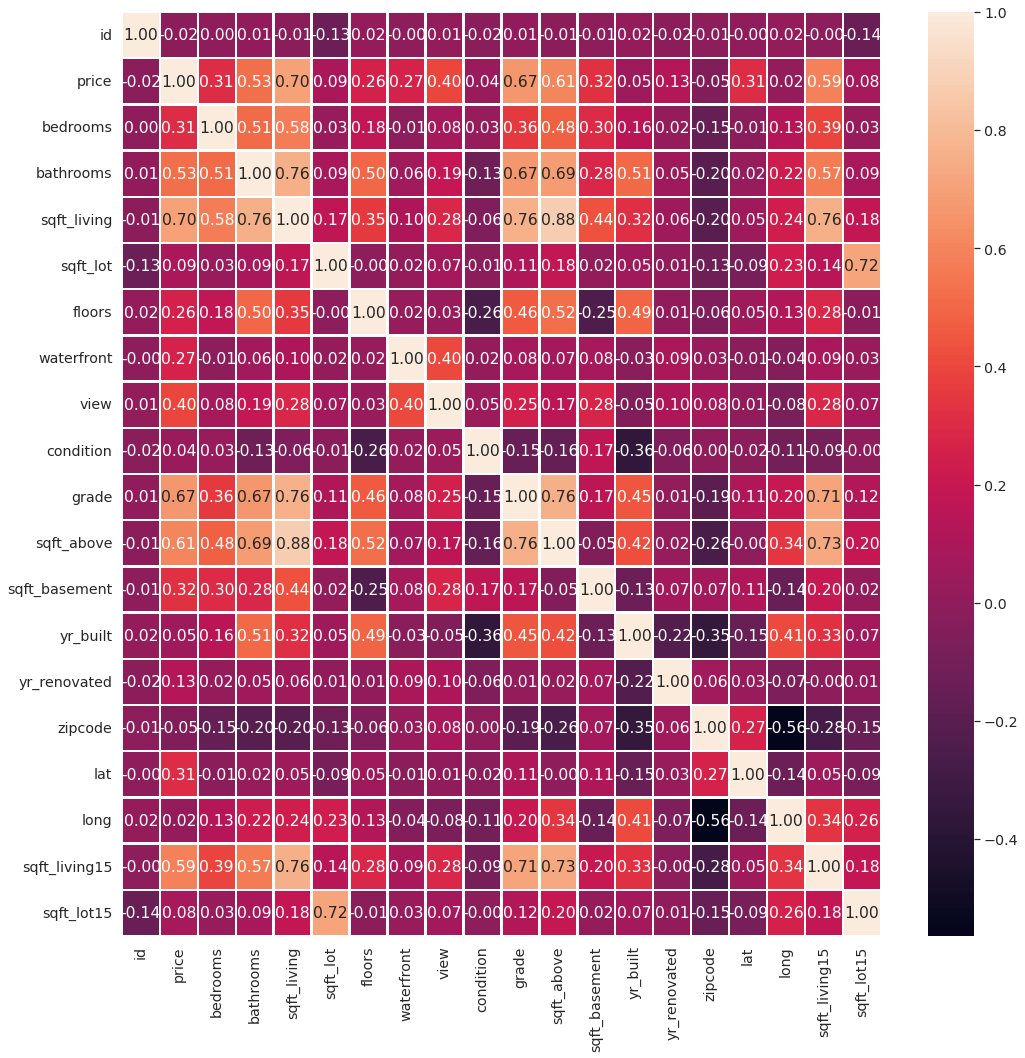

In [18]:
sns.heatmap(df_Houses.corr(),linewidths=1.5
            ,annot=True,fmt='.2f')

In [19]:
df_Houses.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [20]:
df_Houses.corr()['price'][(df_Houses.corr()['price']>=0.5) | (df_Houses.corr()['price']<=-0.5) ]

price            1.000000
bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64

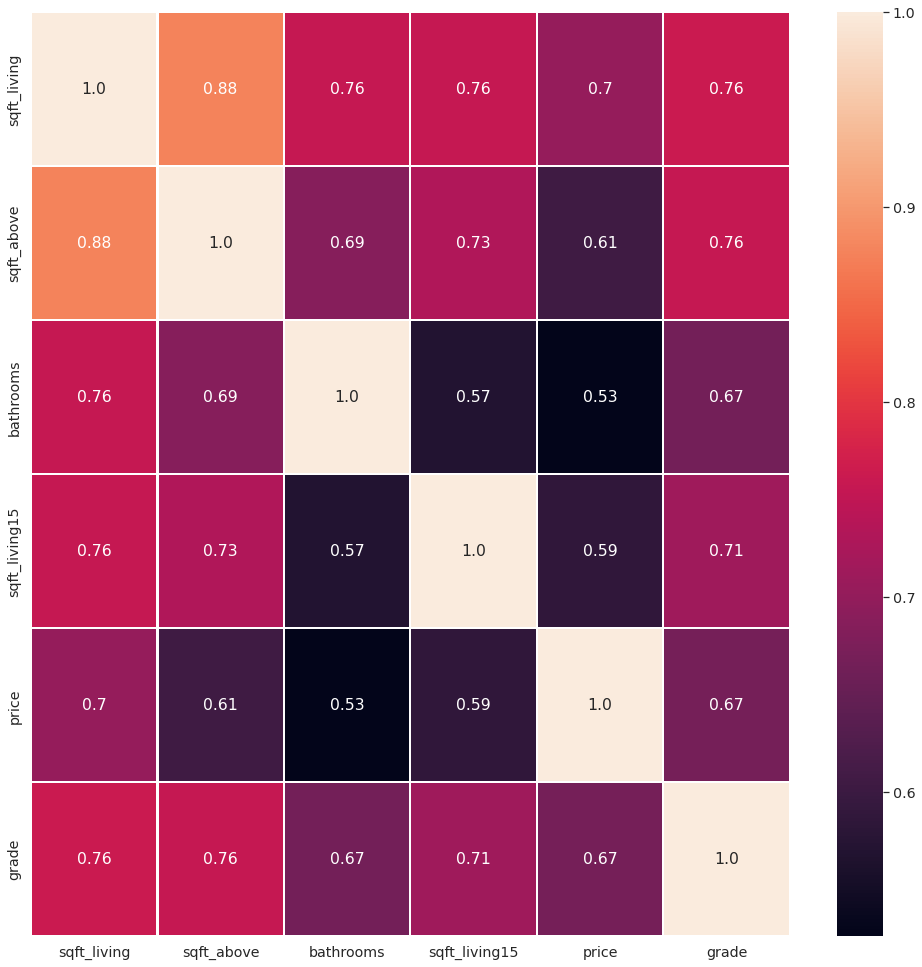

In [21]:
sns.heatmap(df_Houses[['sqft_living','sqft_above','bathrooms','sqft_living15','price','grade']].corr(),linewidths=1.4,annot=True,fmt='.2')

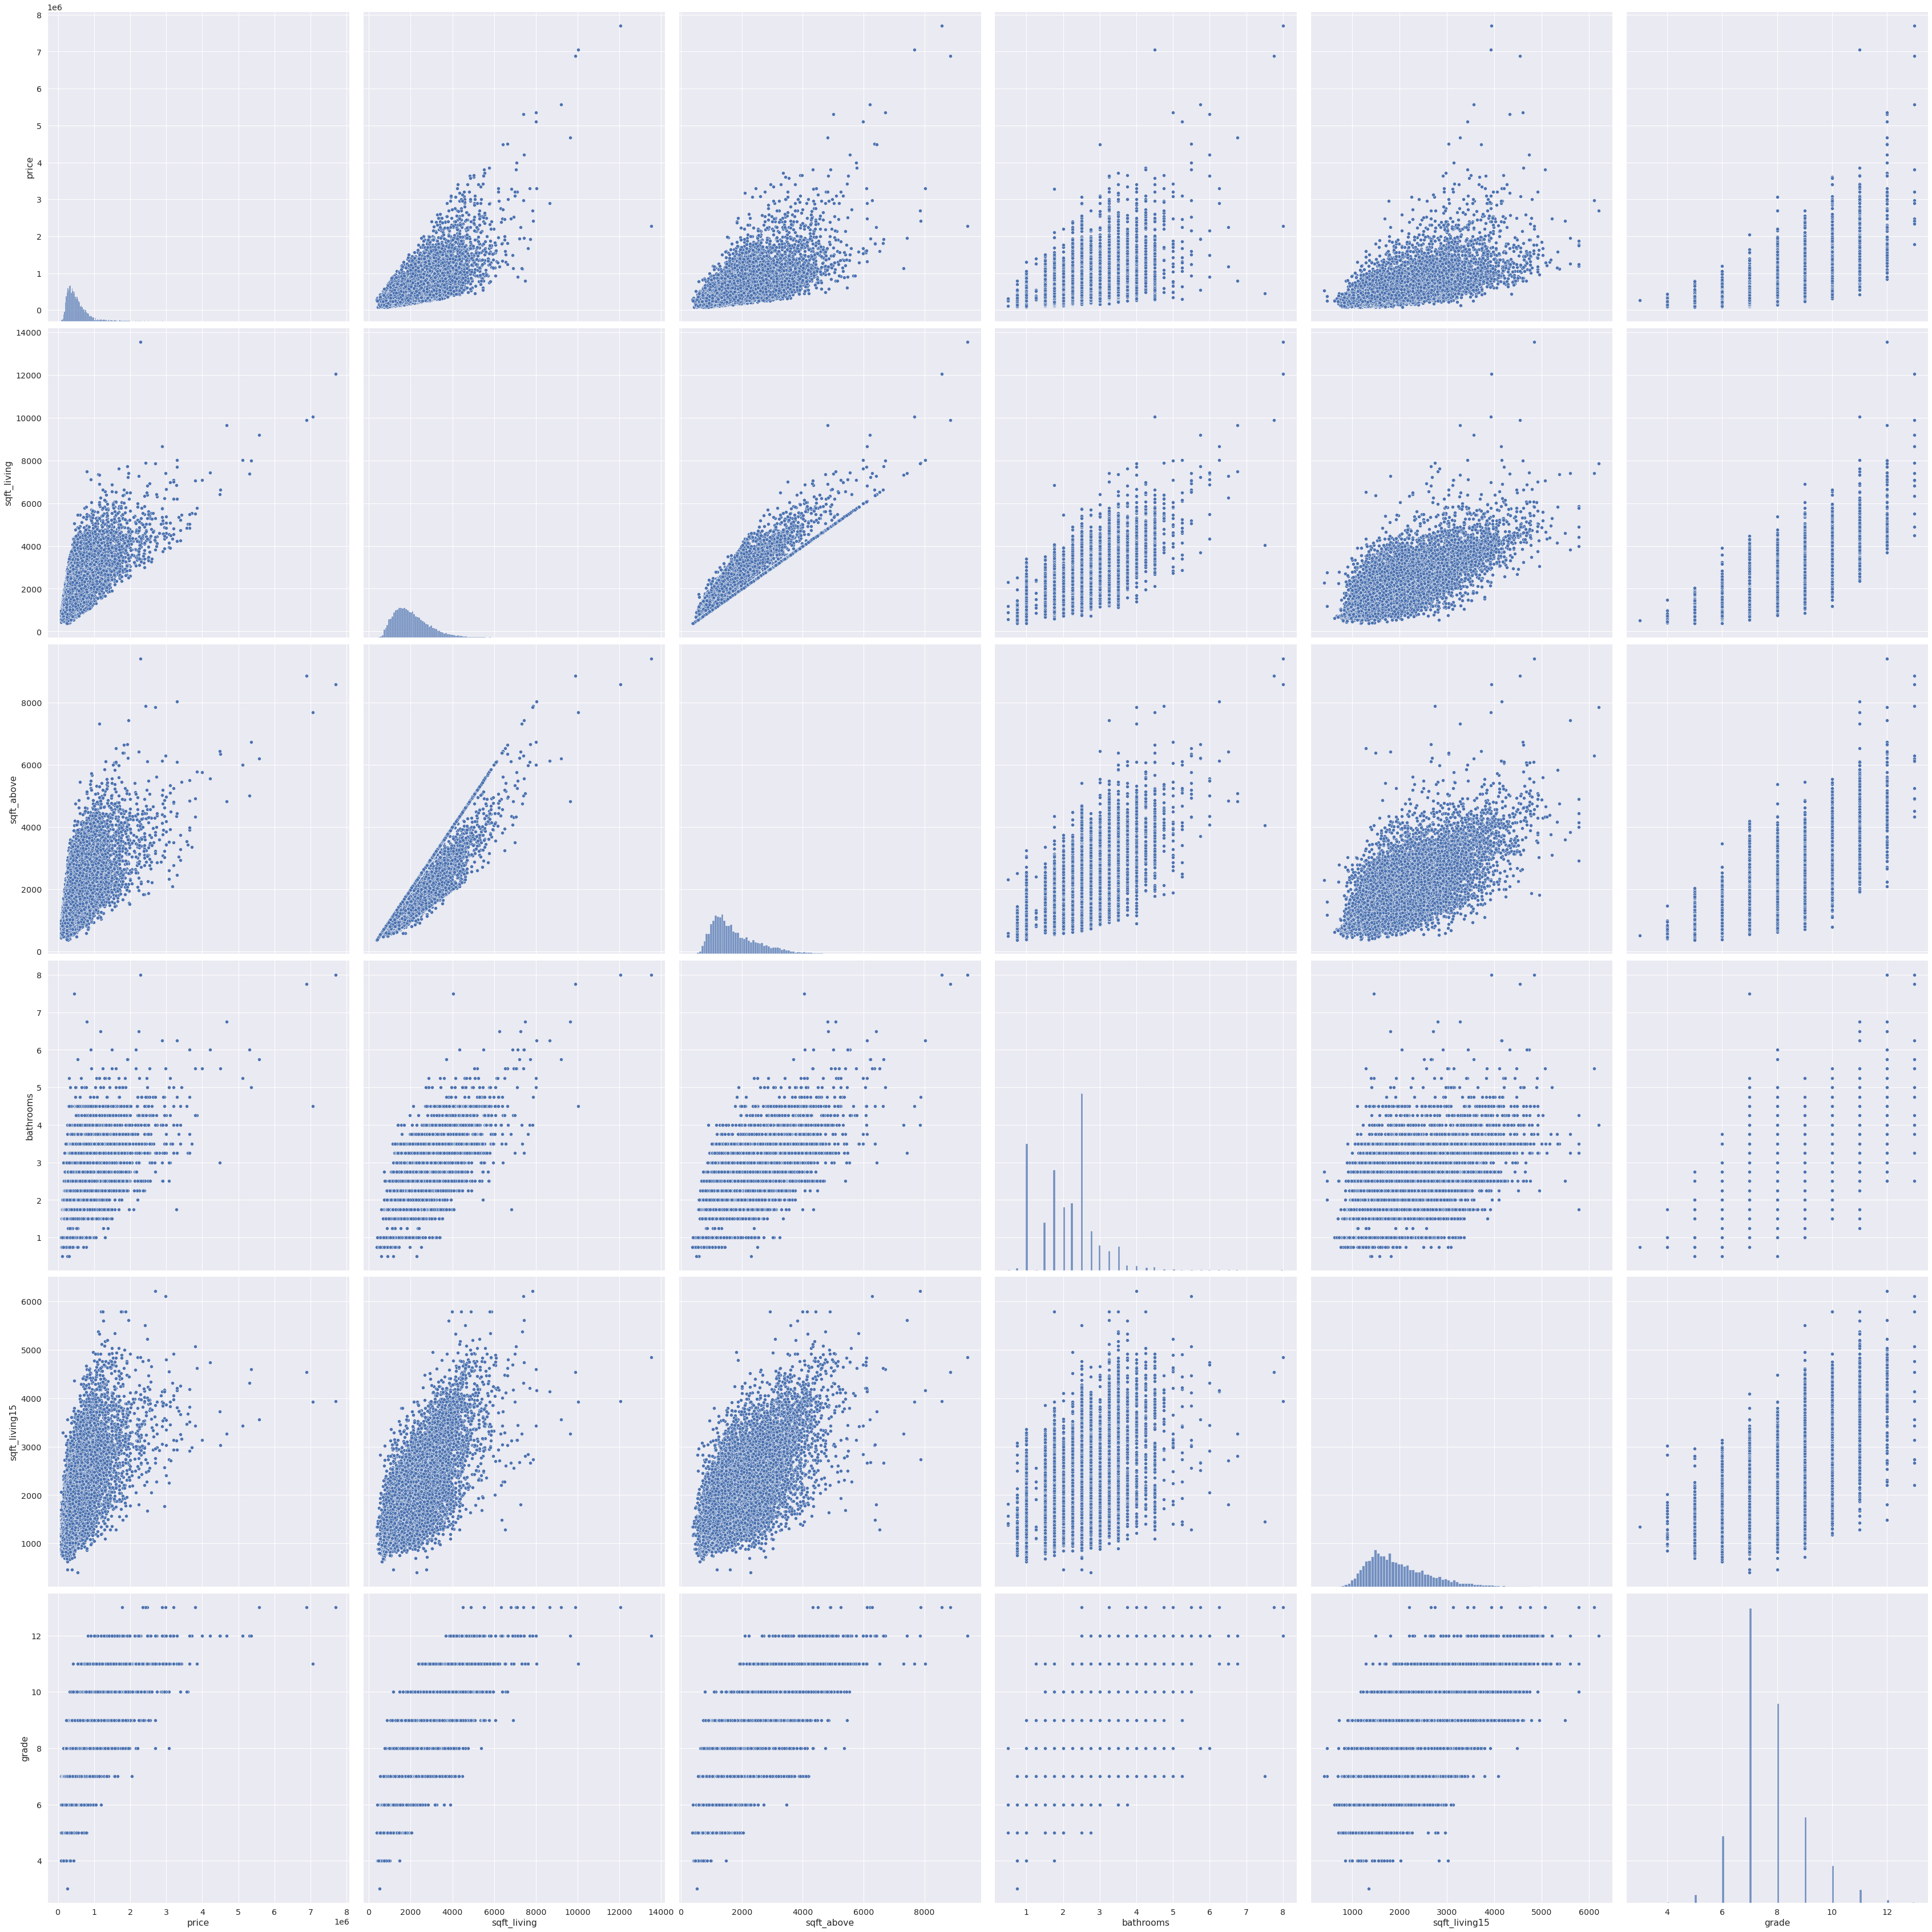

In [22]:
sns.pairplot(df_Houses[['price','sqft_living','sqft_above','bathrooms','sqft_living15','grade']],height=8)

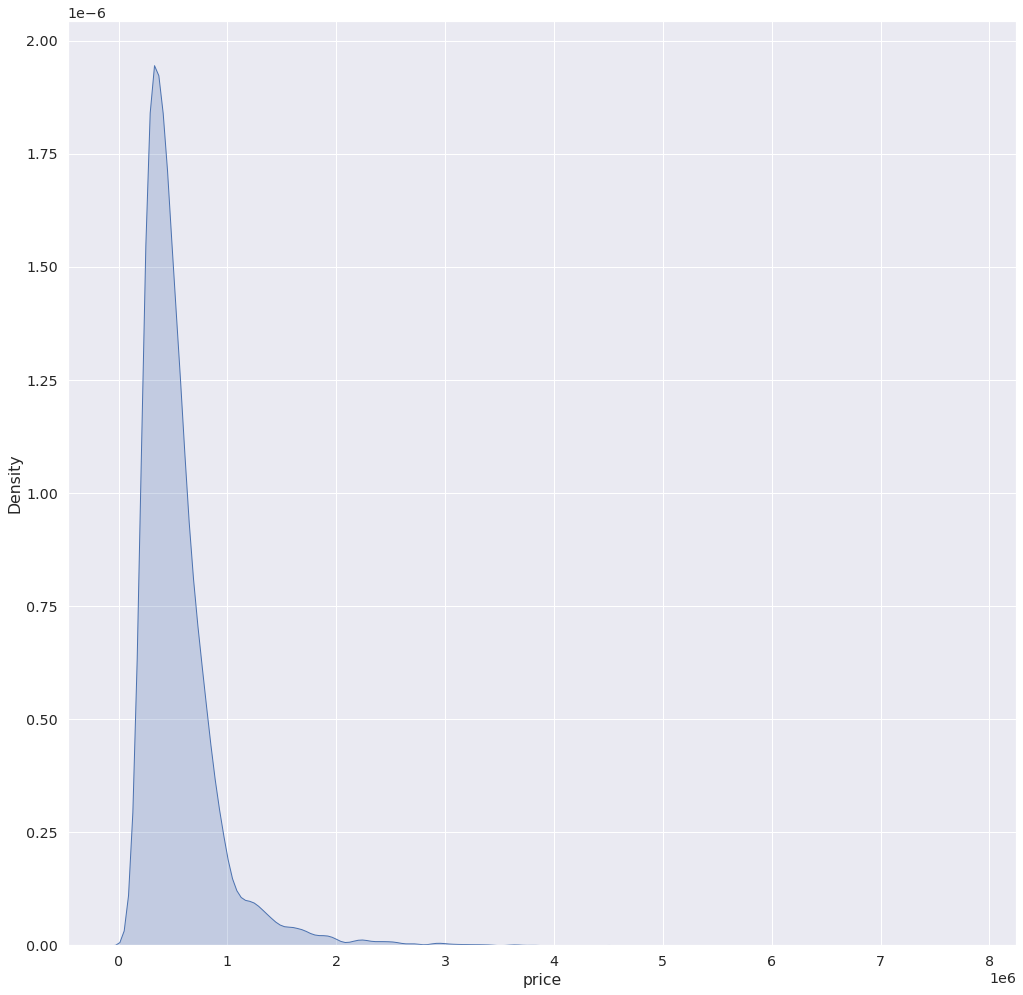

In [23]:
sns.kdeplot(x=df_Houses['price'],shade=True)

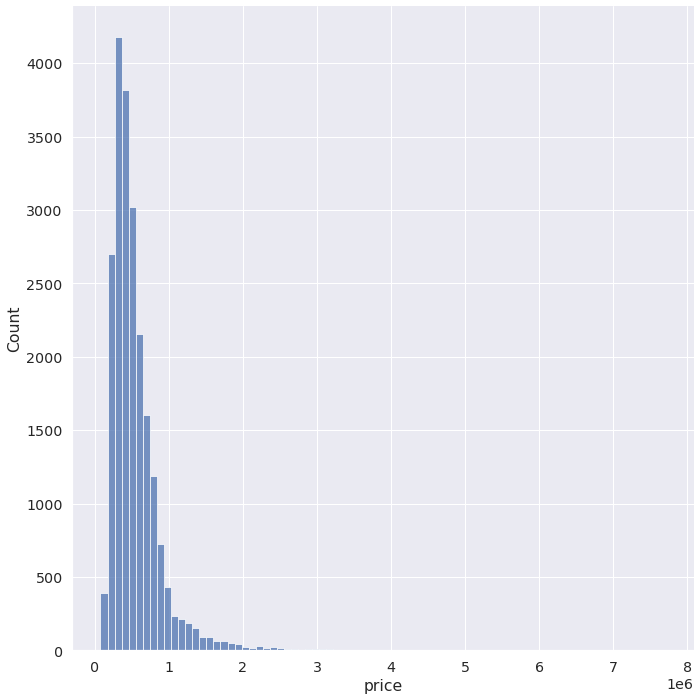

In [24]:
sns.displot(x=df_Houses['price'],kde=False,bins =80,height=10)

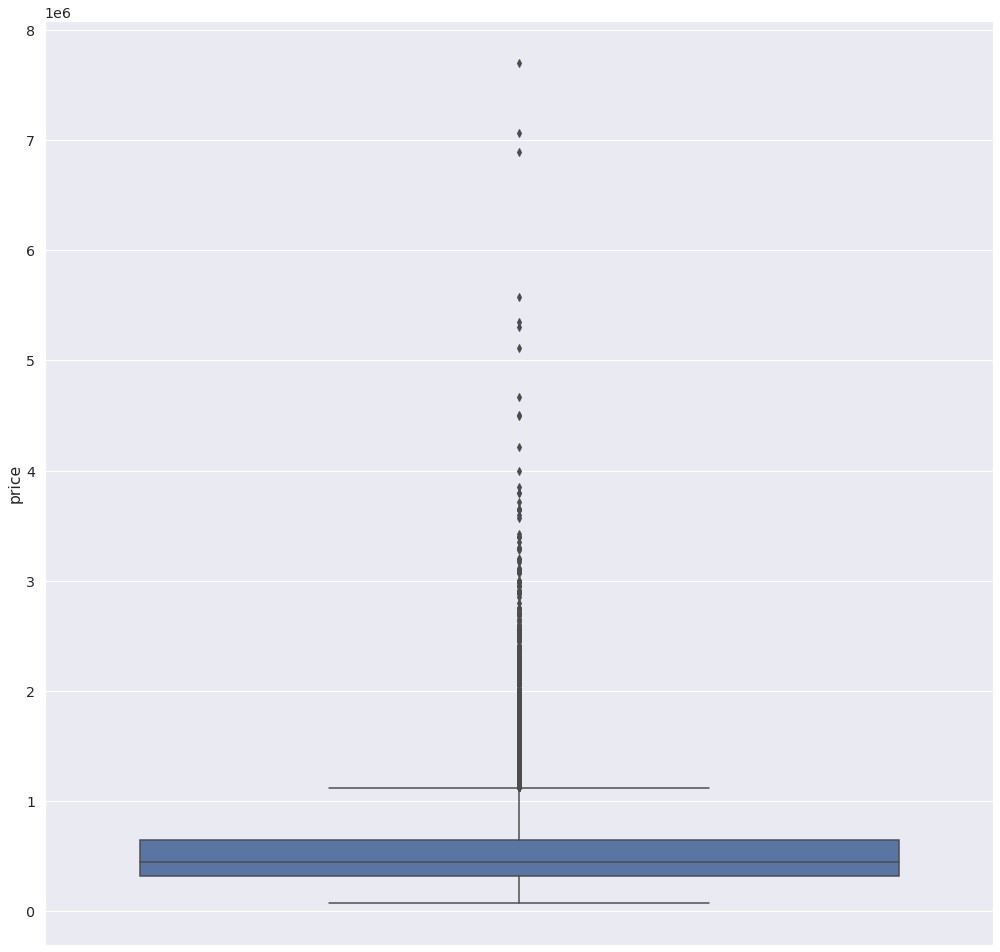

In [25]:
sns.boxplot(y=df_Houses['price'])

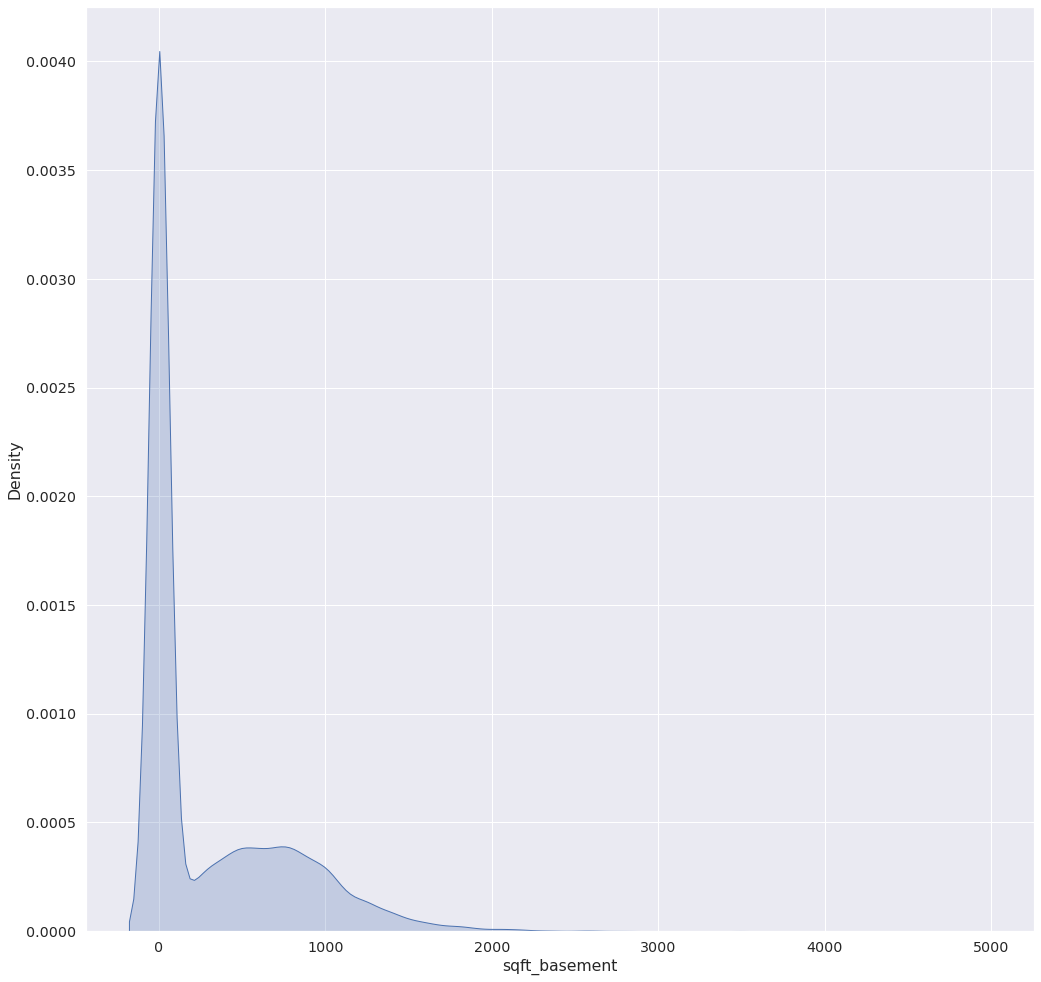

In [26]:
sns.kdeplot(x=df_Houses['sqft_basement'],shade = True)

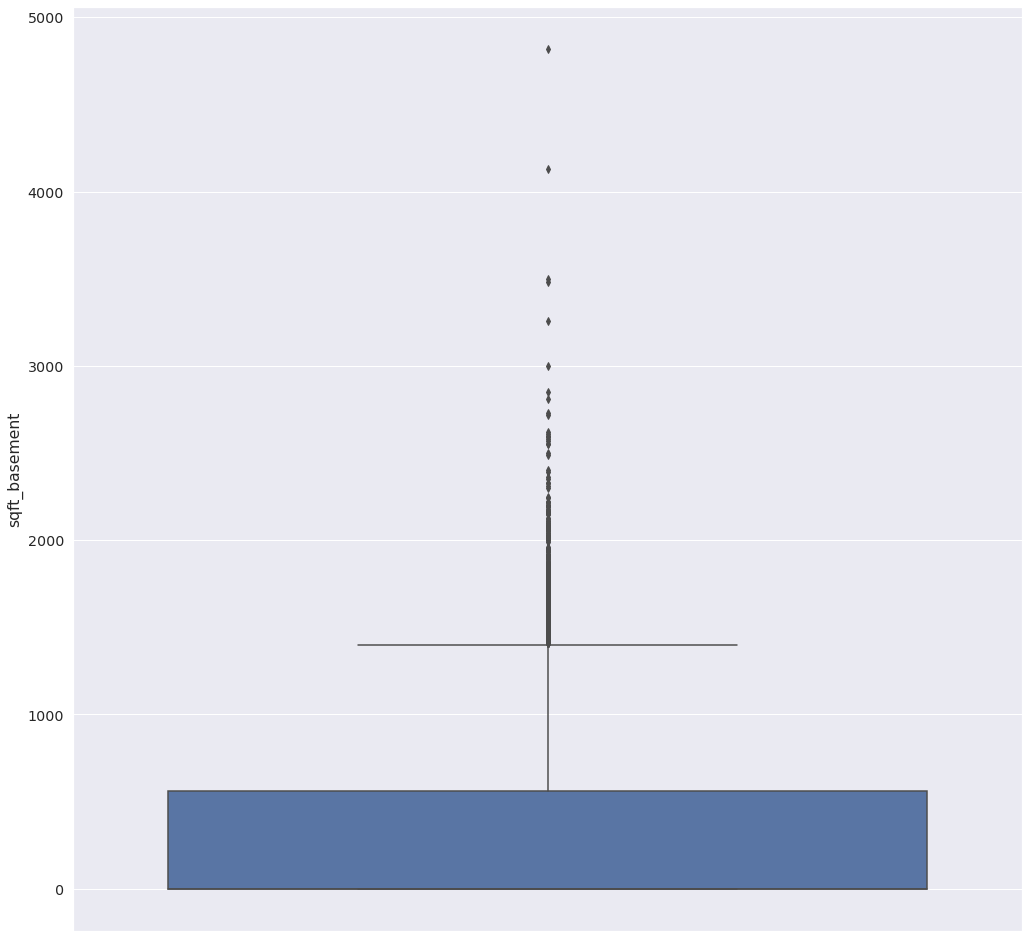

In [27]:
sns.boxplot(y=df_Houses['sqft_basement'])

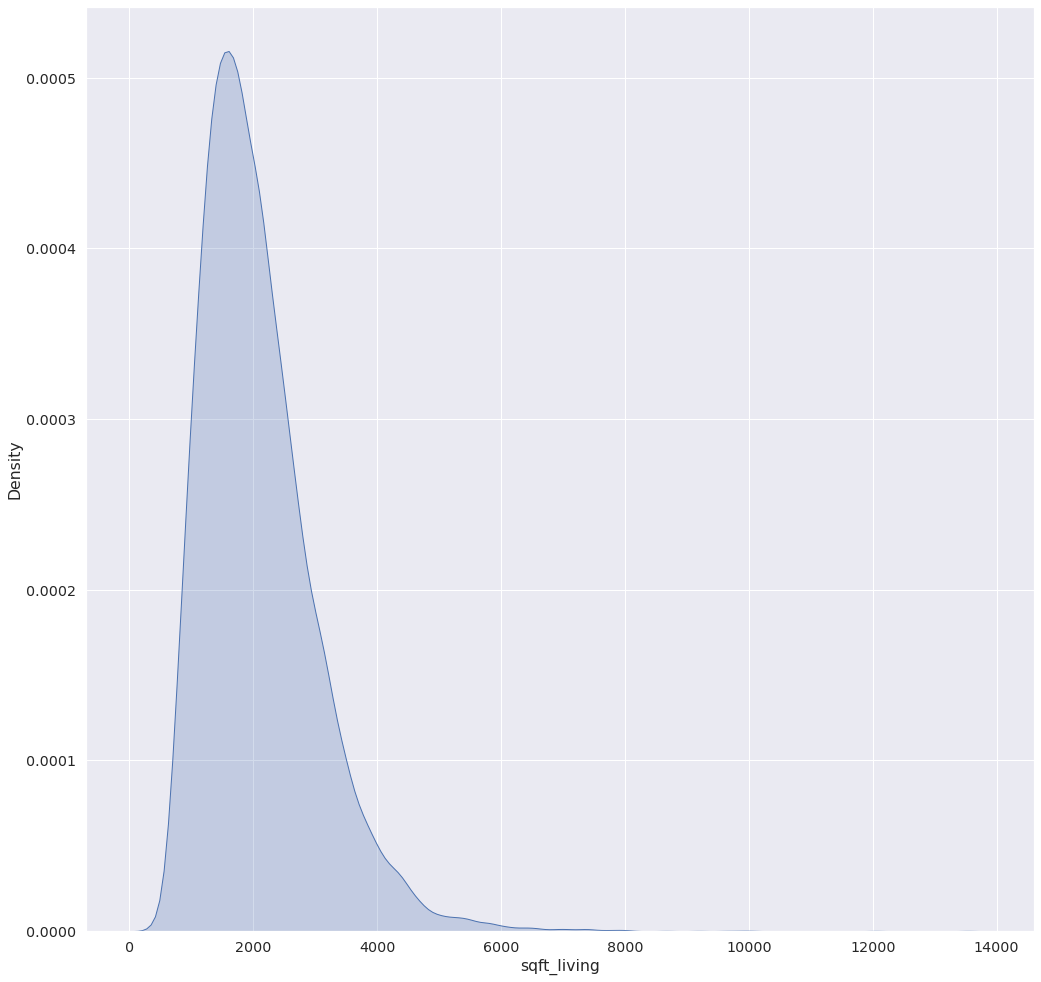

In [28]:
sns.kdeplot(x=df_Houses['sqft_living'],shade = True)

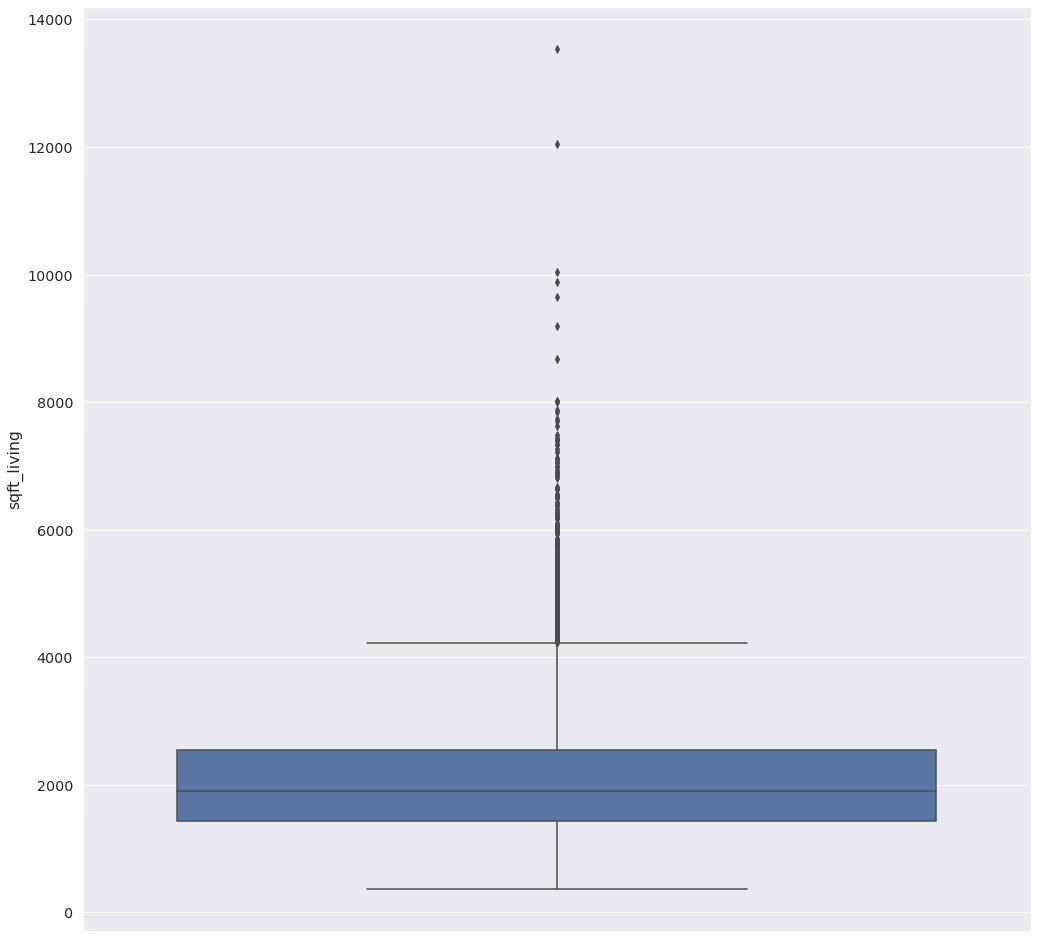

In [29]:
sns.boxplot(y=df_Houses['sqft_living'])

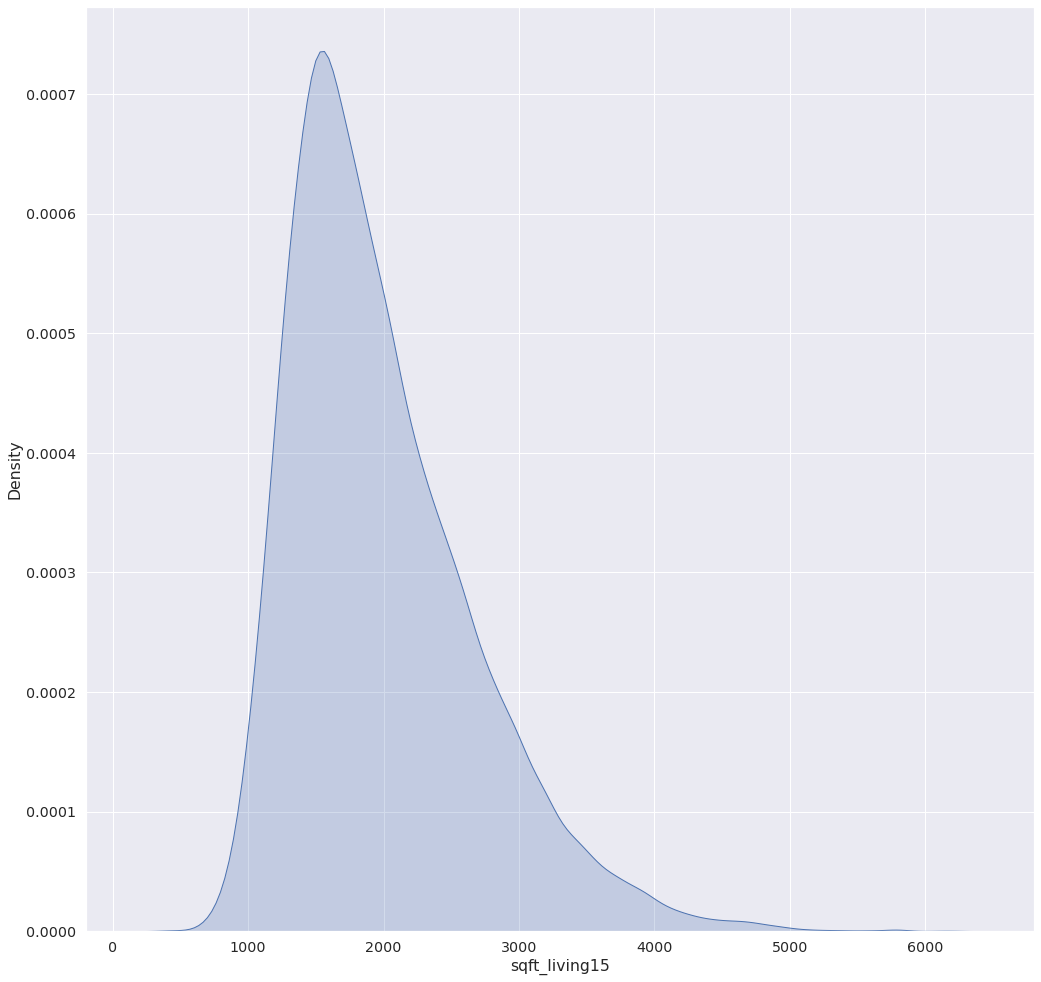

In [30]:
sns.kdeplot(x=df_Houses['sqft_living15'],shade = True)

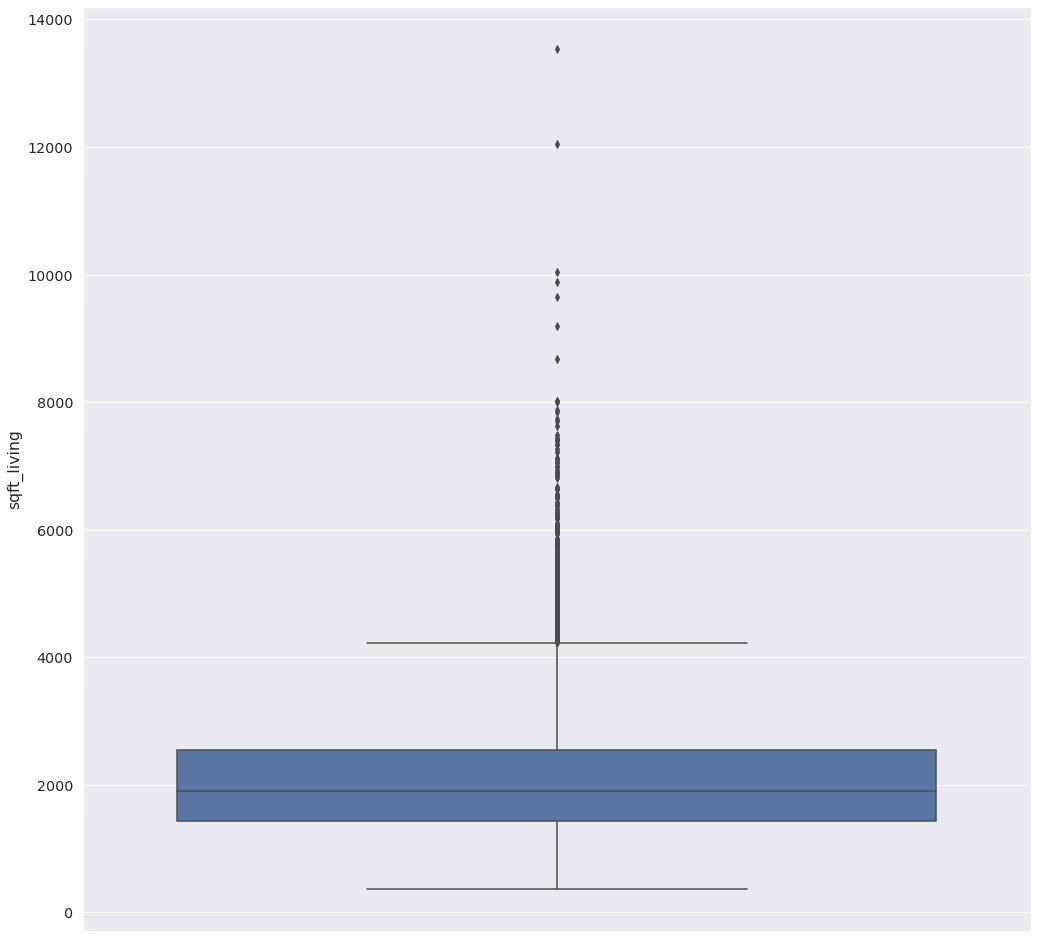

In [31]:
sns.boxplot(y=df_Houses['sqft_living'])

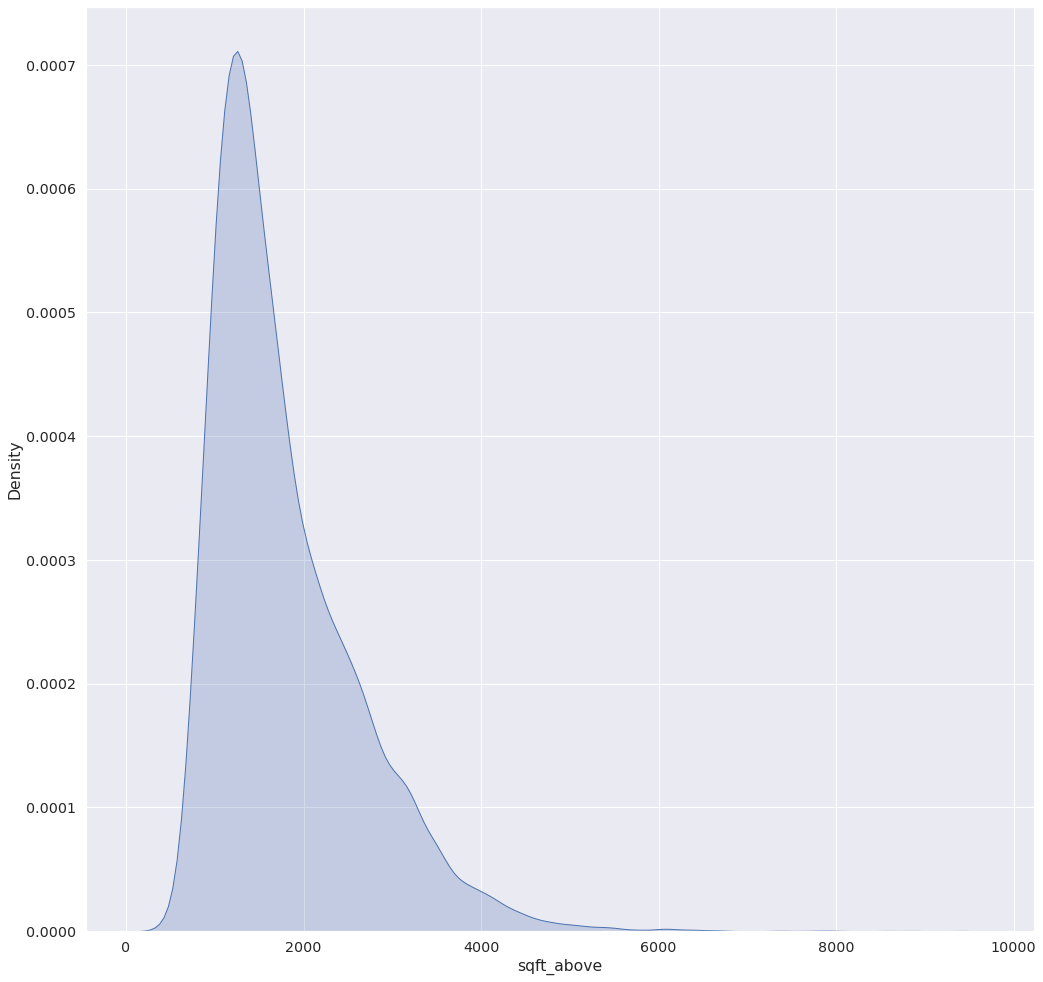

In [32]:
sns.kdeplot(x=df_Houses['sqft_above'],shade=True)

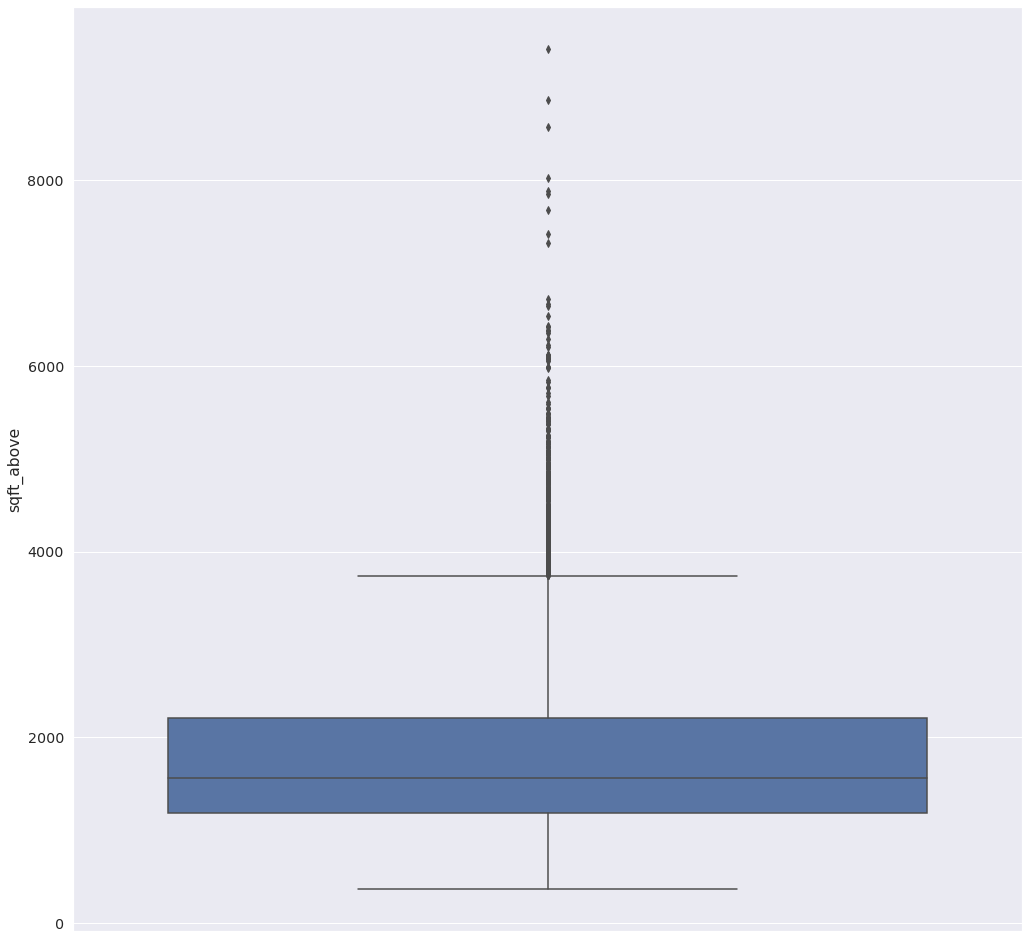

In [33]:
sns.boxplot(y=df_Houses['sqft_above'])

In [34]:
df_Houses['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


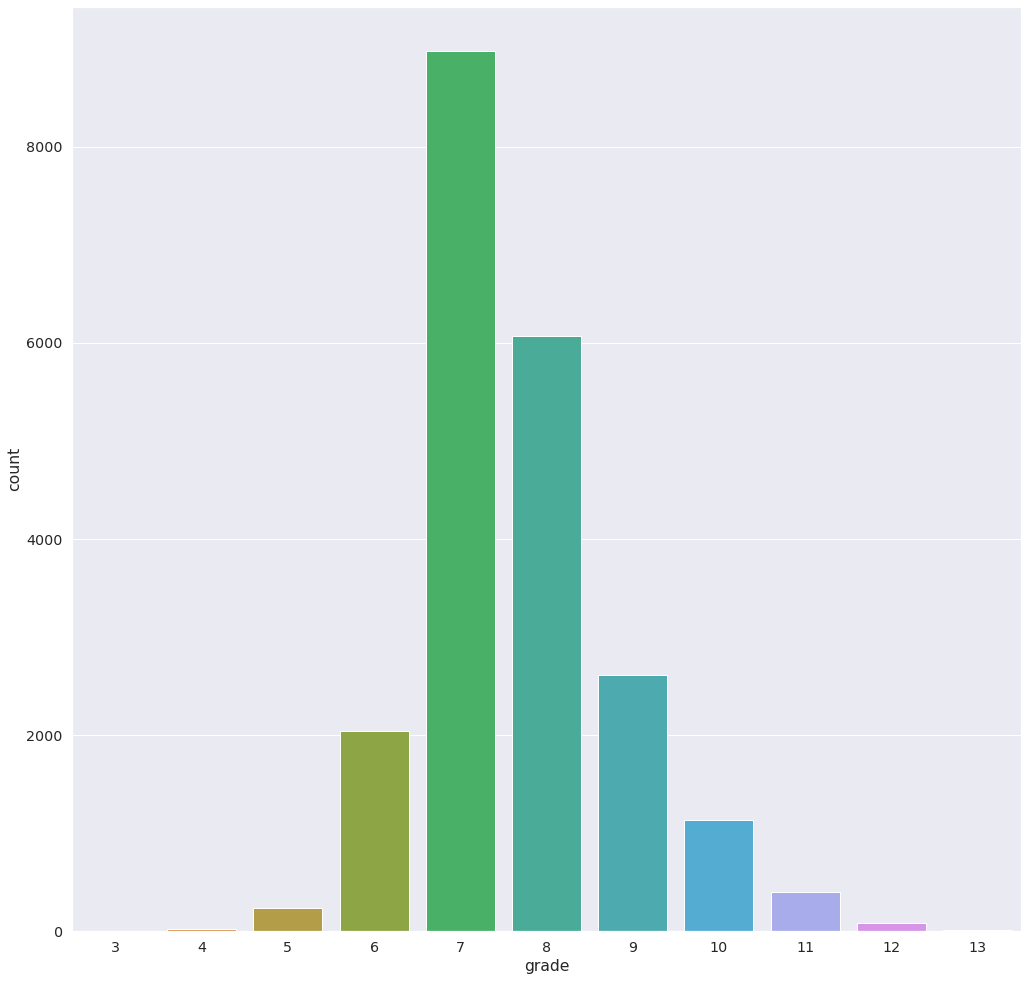

In [35]:
sns.countplot(df_Houses['grade'])

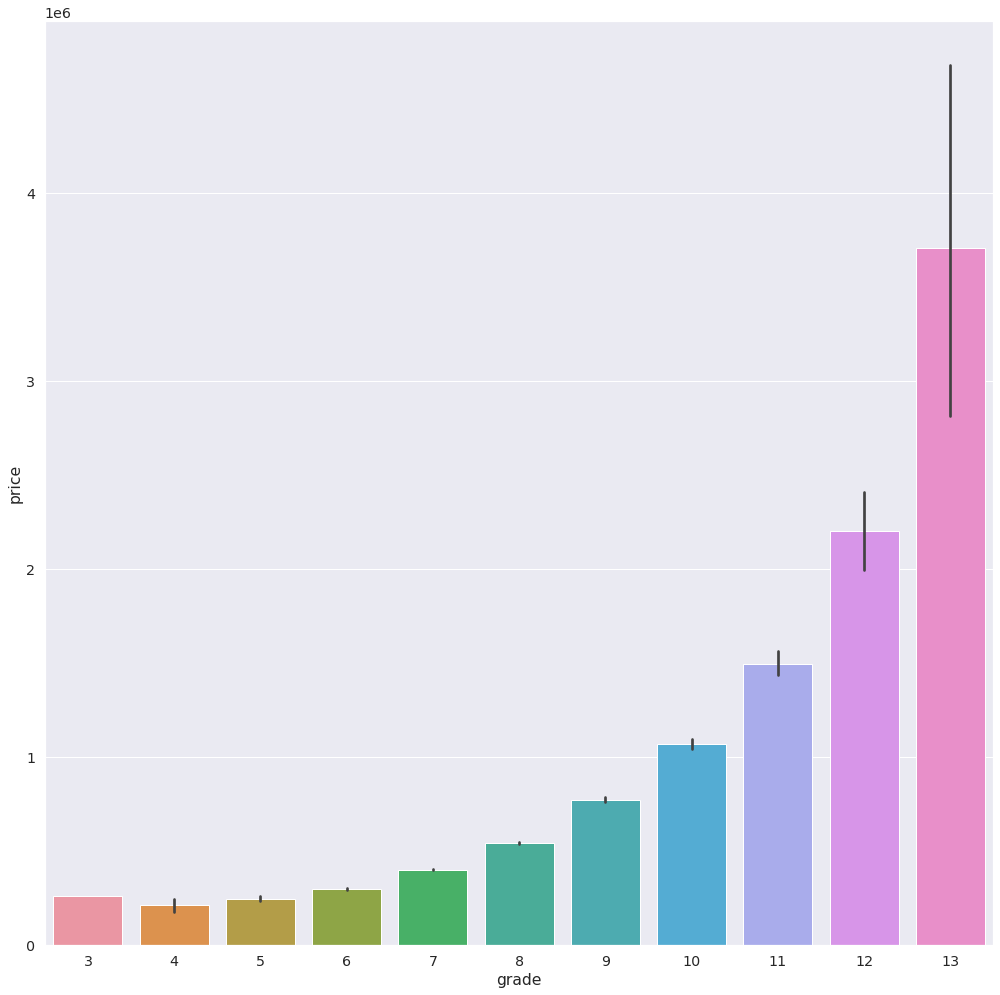

In [36]:
sns.barplot(y=df_Houses['price'],x=df_Houses['grade'])

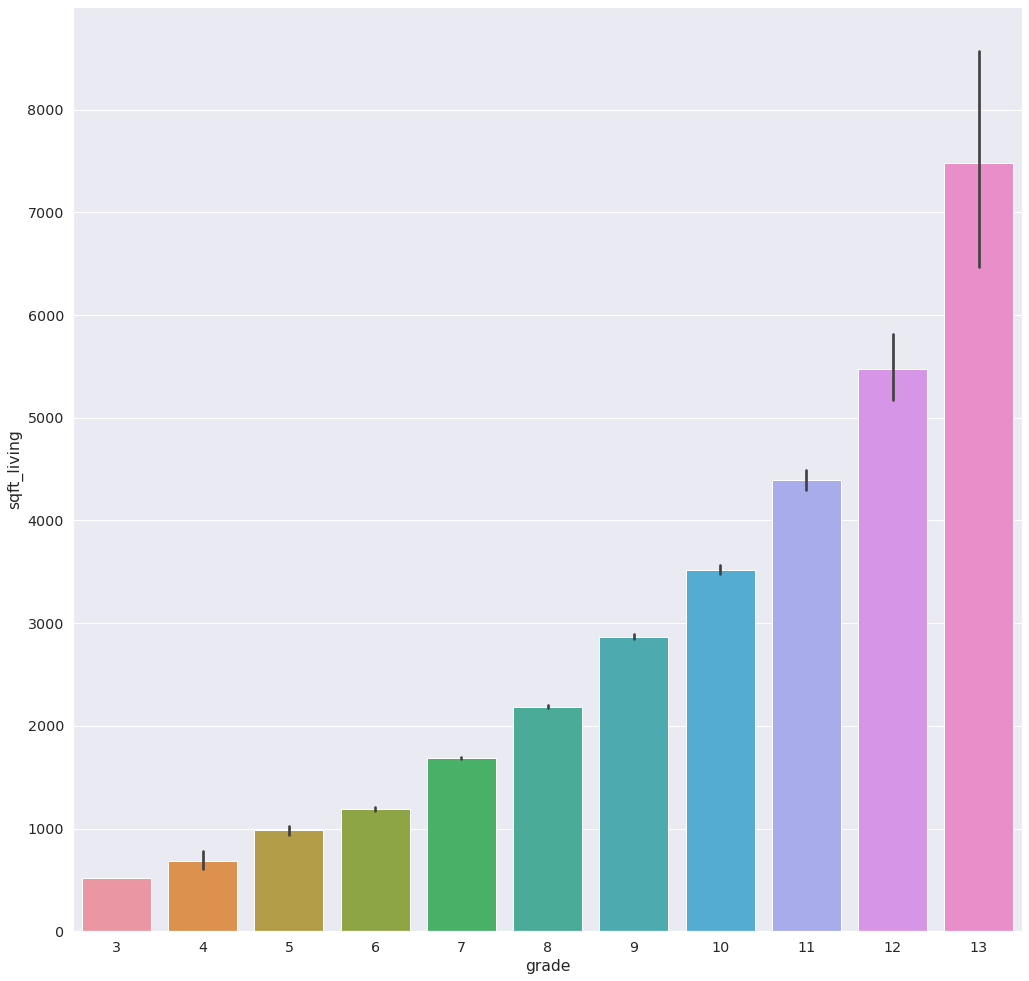

In [37]:
sns.barplot(y=df_Houses['sqft_living'],x=df_Houses['grade'])

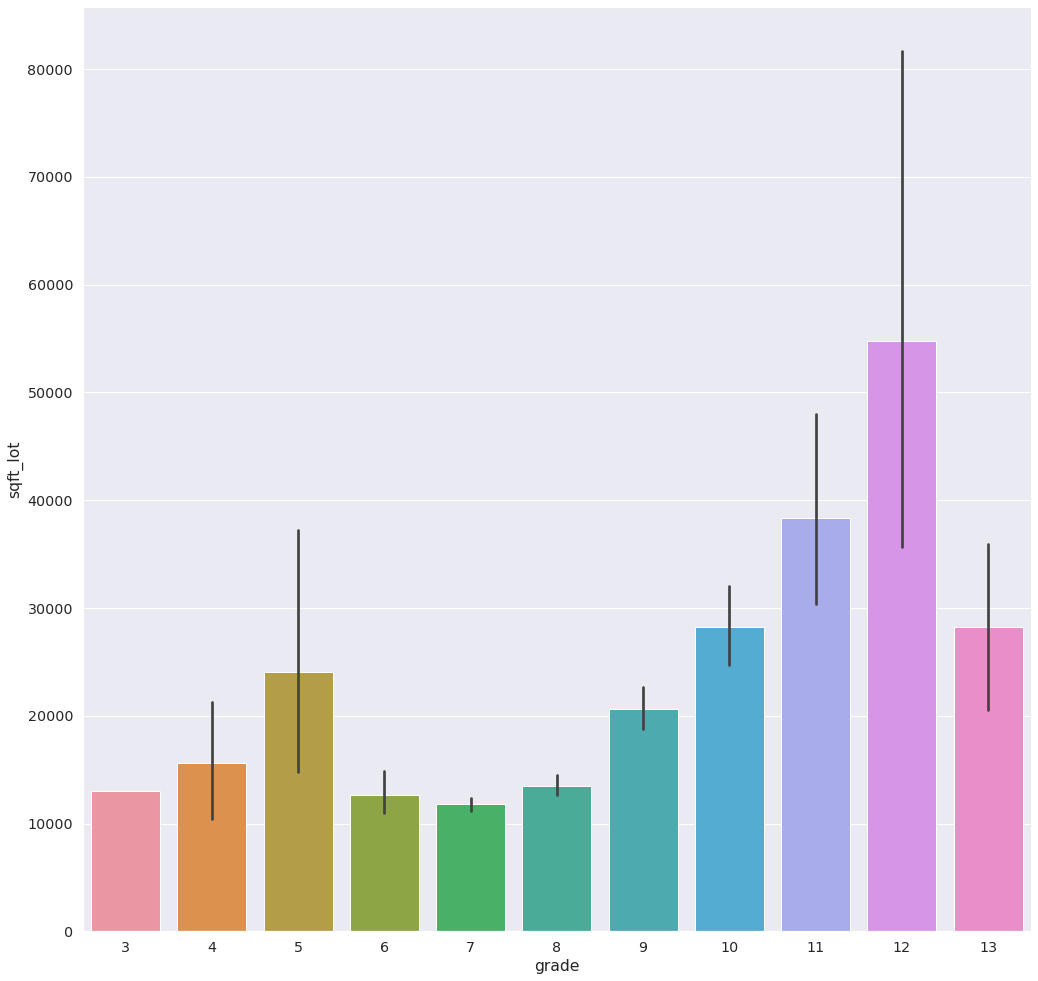

In [38]:
sns.barplot(y=df_Houses['sqft_lot'],x=df_Houses['grade'])

In [39]:
df_Houses['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

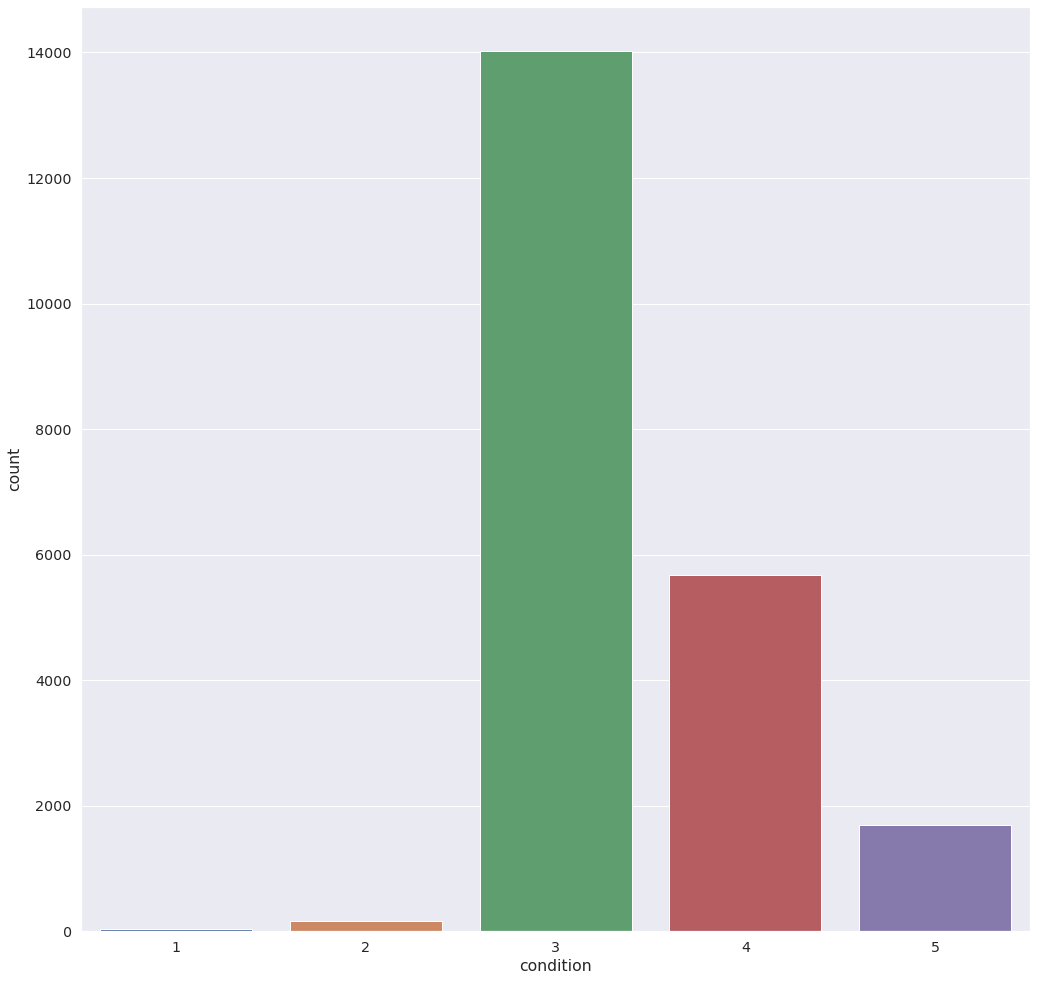

In [40]:
sns.countplot(x=df_Houses['condition'])

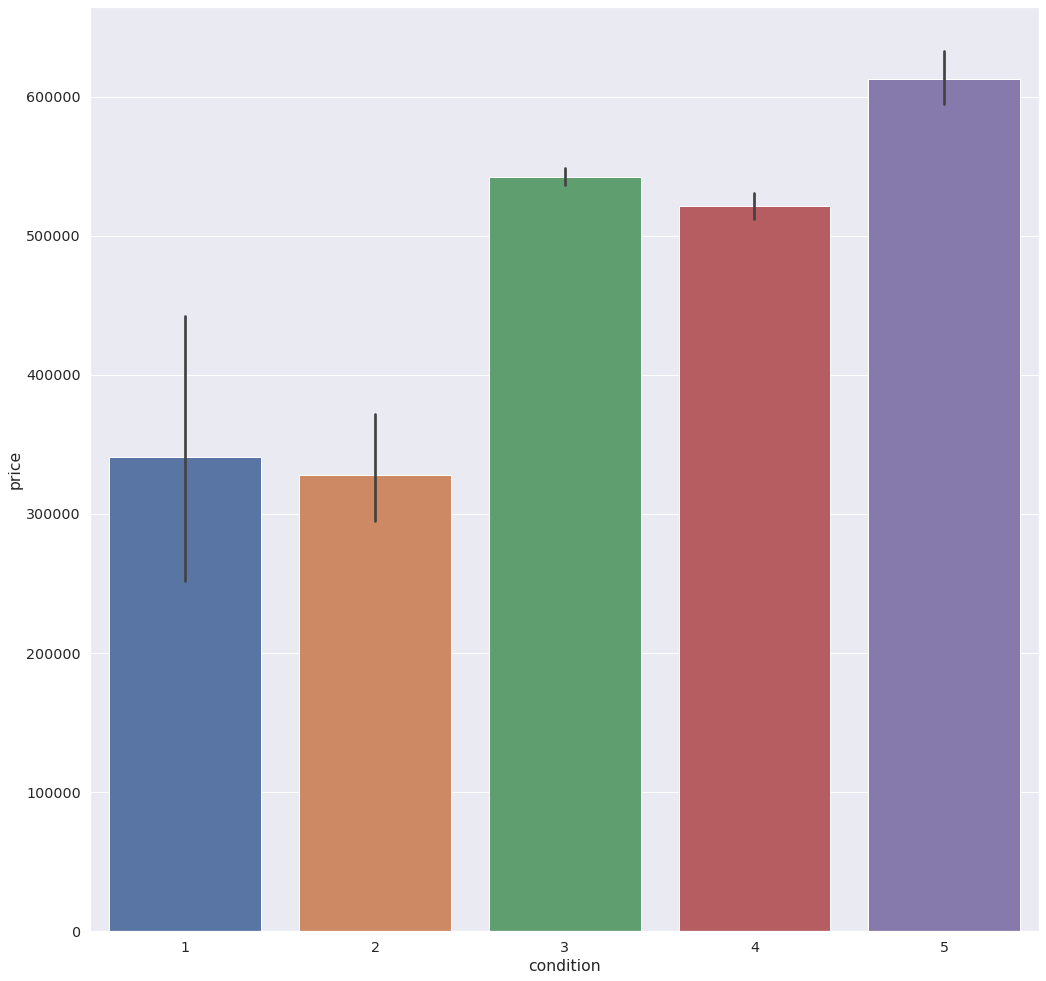

In [41]:
sns.barplot(x=df_Houses['condition'],
            y = df_Houses['price'])

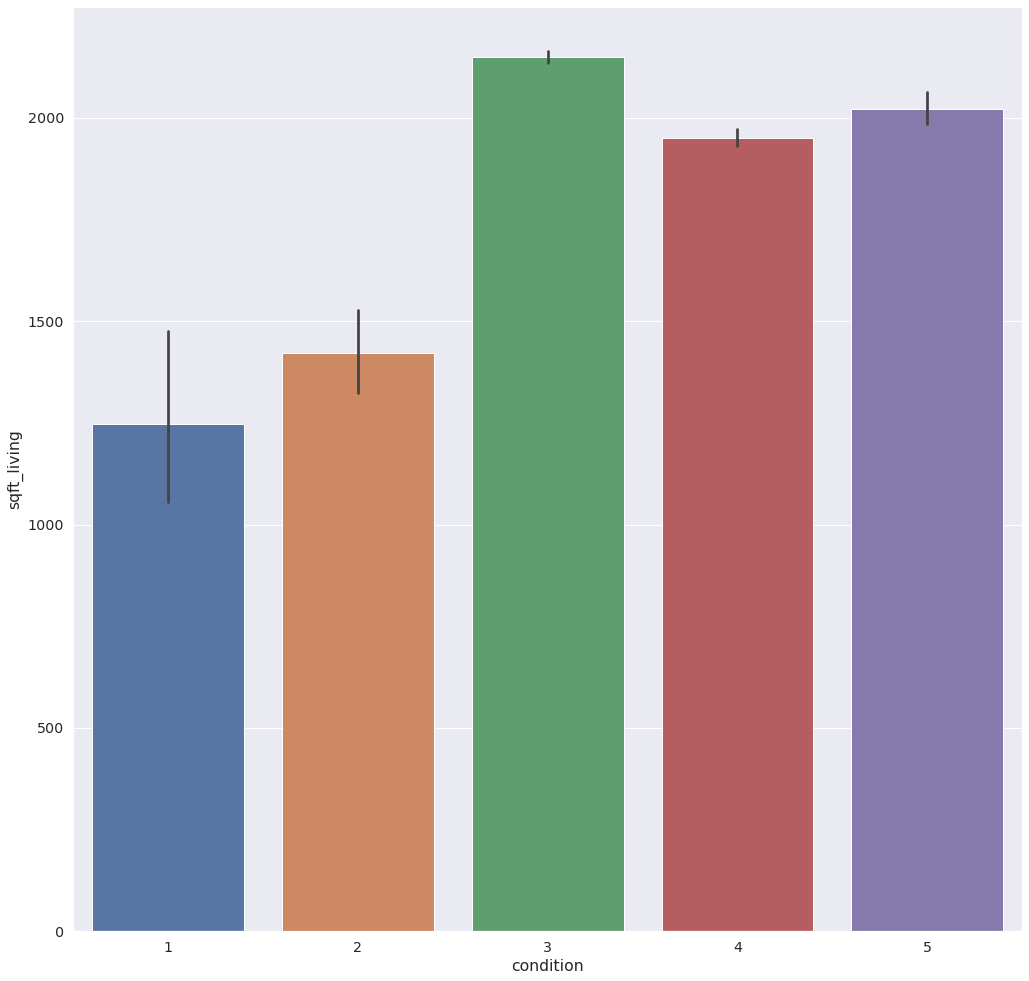

In [42]:
sns.barplot(y=df_Houses['sqft_living'],x=df_Houses['condition'])

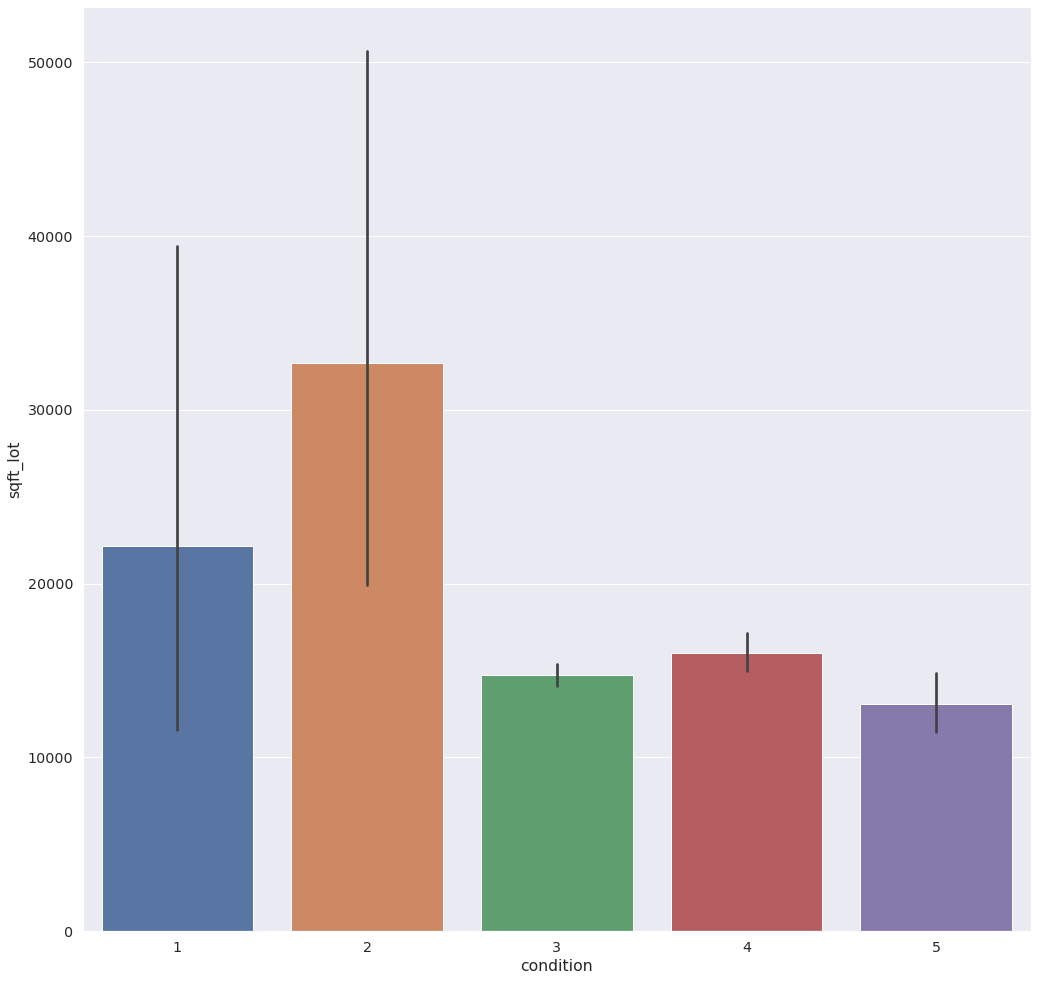

In [43]:
sns.barplot(y=df_Houses['sqft_lot'],x=df_Houses['condition'])

In [44]:
df_Houses['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [45]:
df_Houses['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


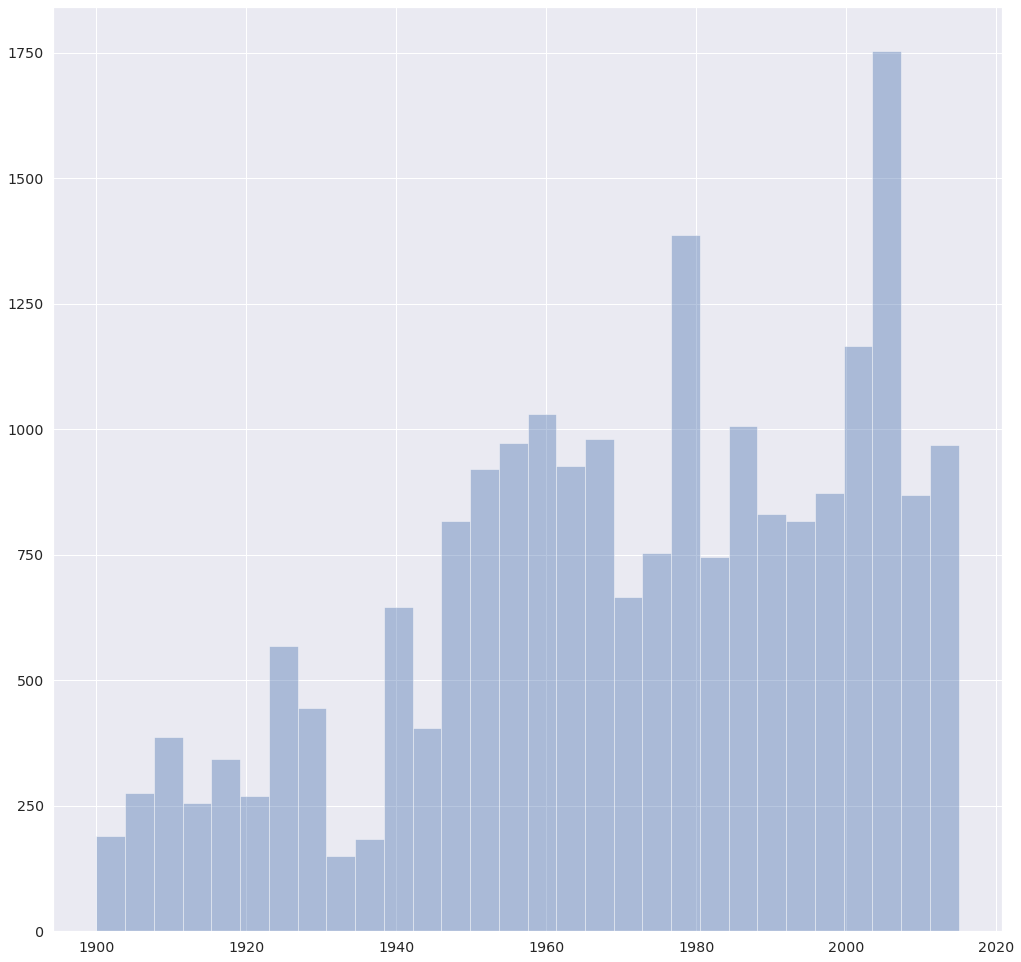

In [46]:
sns.distplot(x=df_Houses['yr_built'],kde=False,bins=30)

In [47]:
df_Houses['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [48]:
df_Houses['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


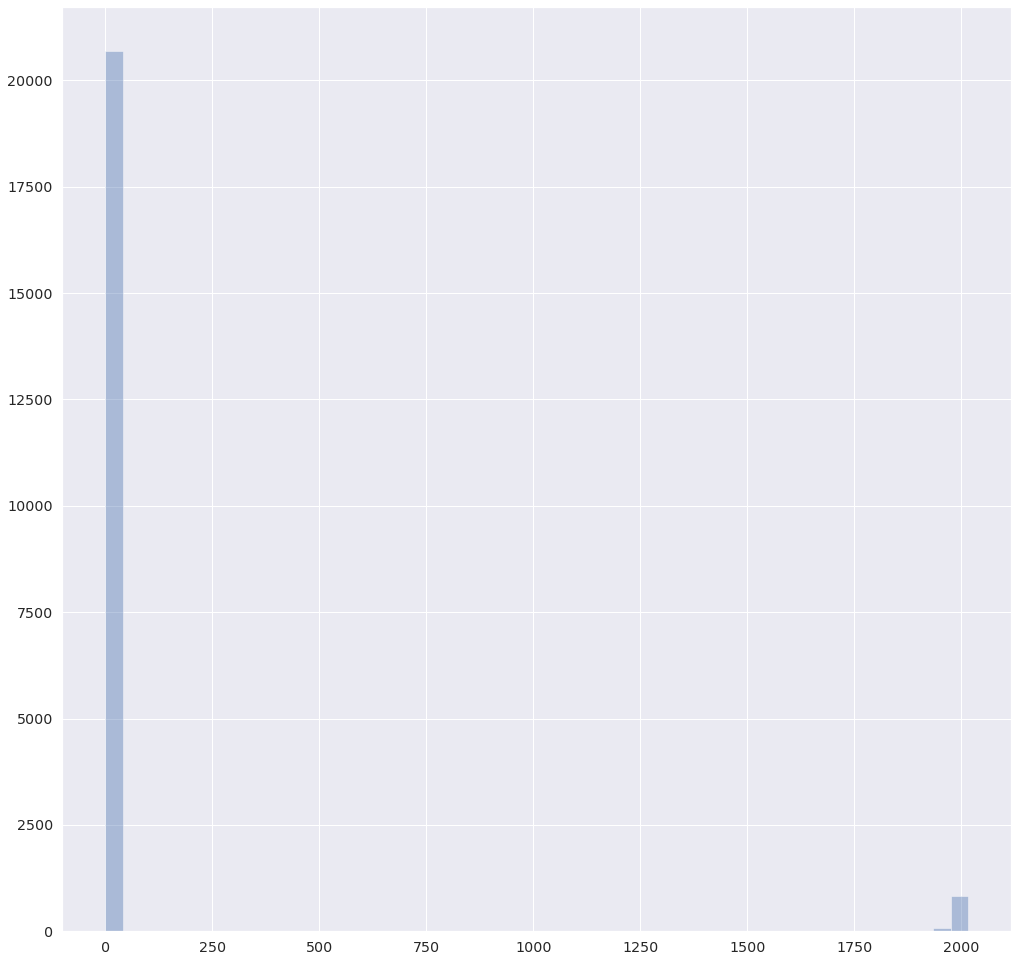

In [49]:
sns.distplot(x=df_Houses['yr_renovated'],kde=False)

In [50]:
df_Houses['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

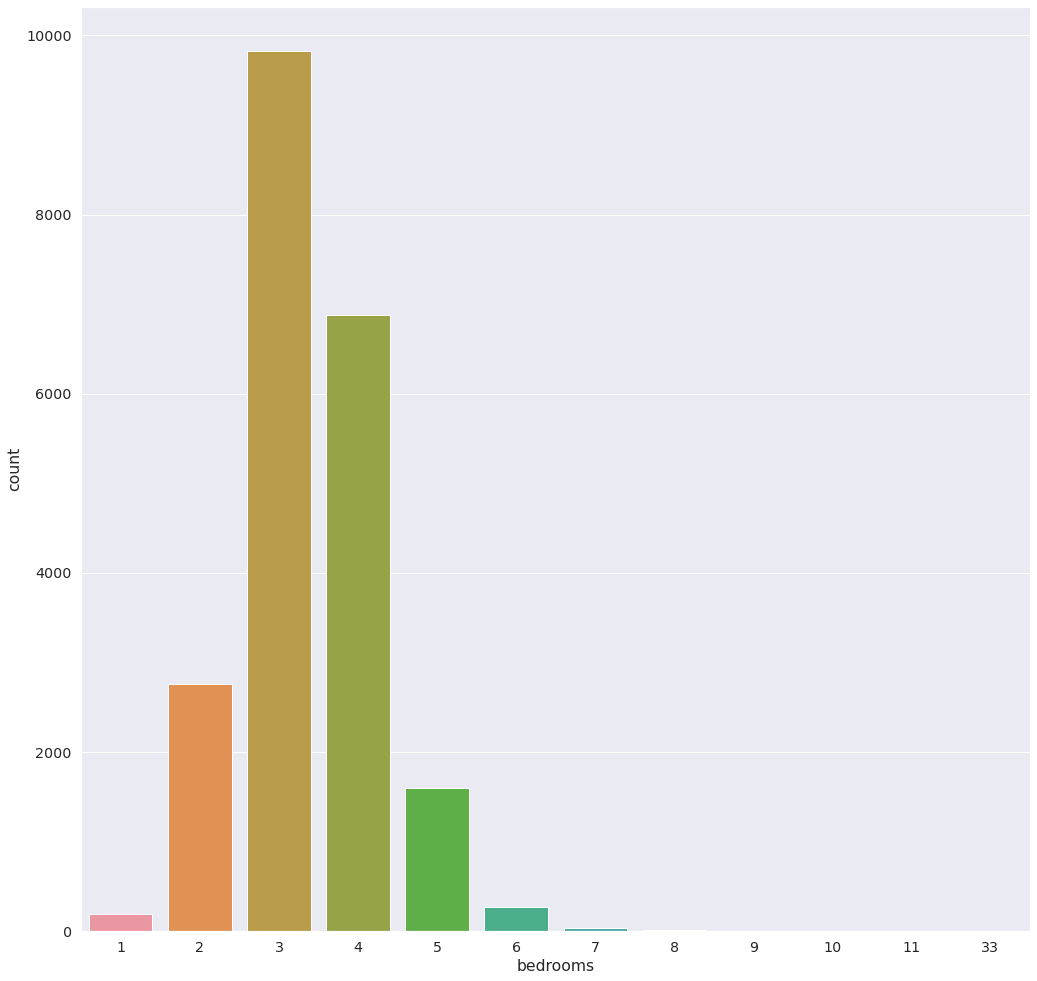

In [51]:
sns.countplot(x=df_Houses['bedrooms'])

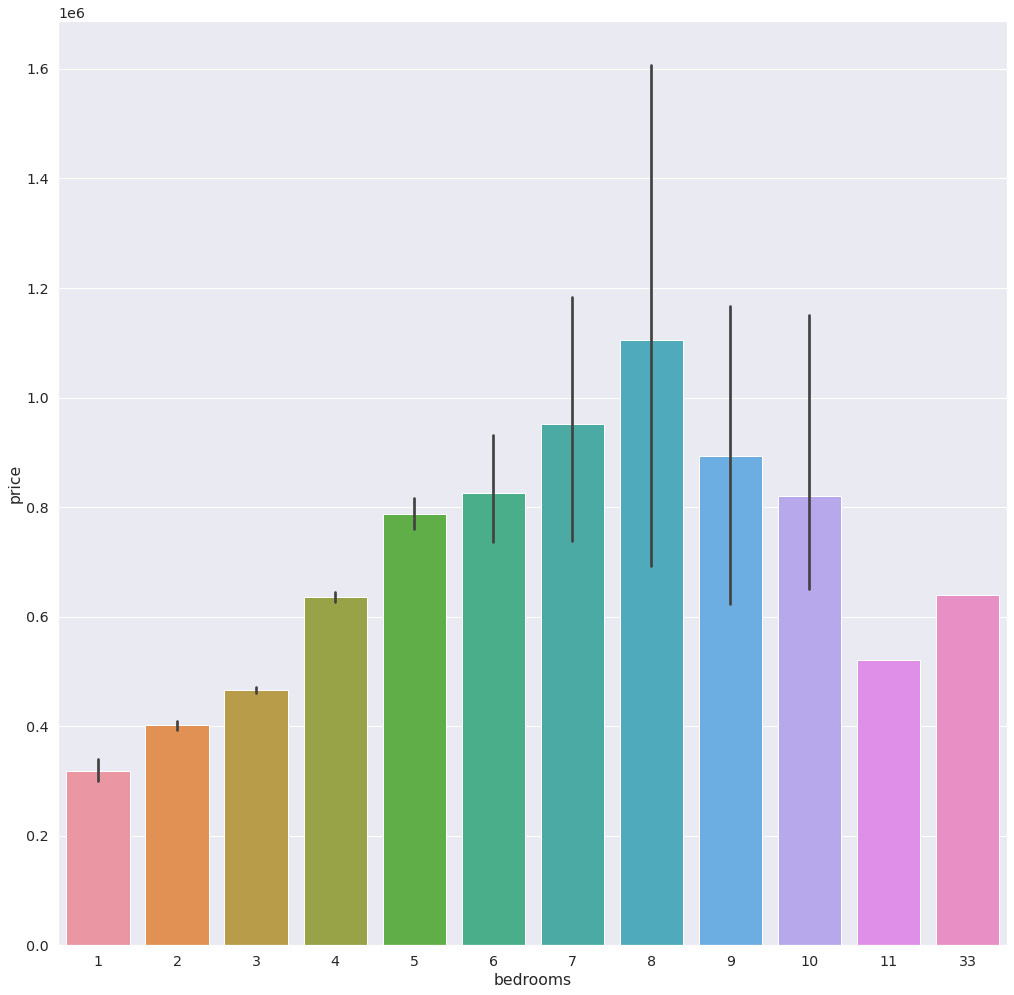

In [52]:
sns.barplot(x=df_Houses['bedrooms'],y=df_Houses['price'])

In [53]:
df_Houses['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

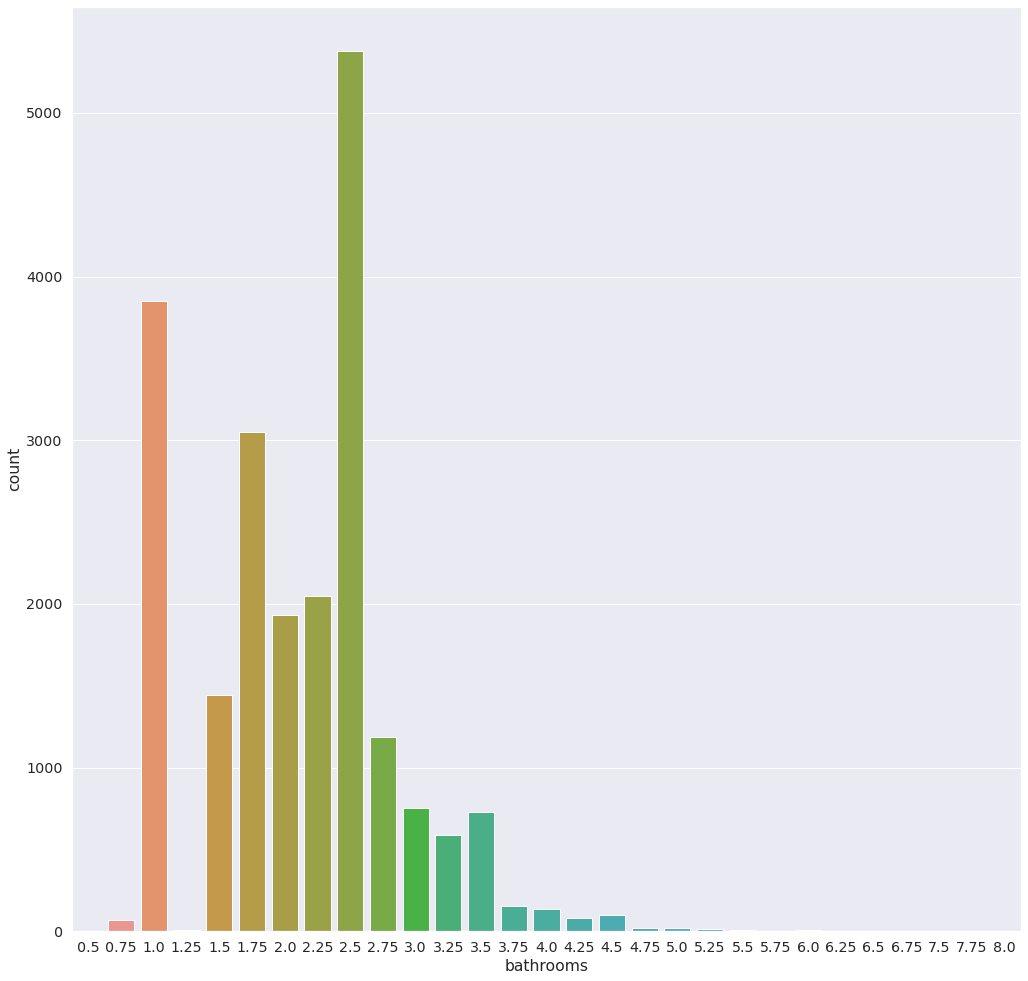

In [54]:
sns.countplot(x=df_Houses['bathrooms'])

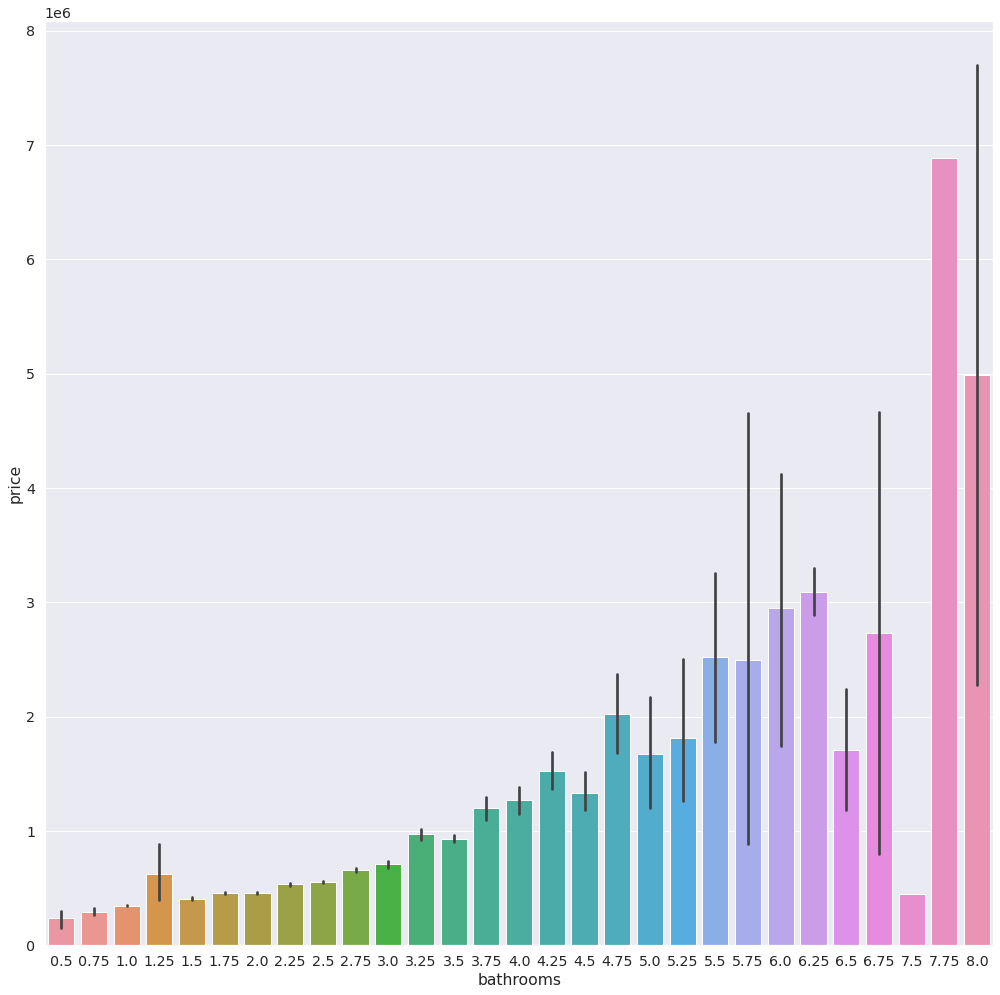

In [55]:
sns.barplot(x=df_Houses['bathrooms'],y=df_Houses['price'])

In [56]:
df_Houses['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

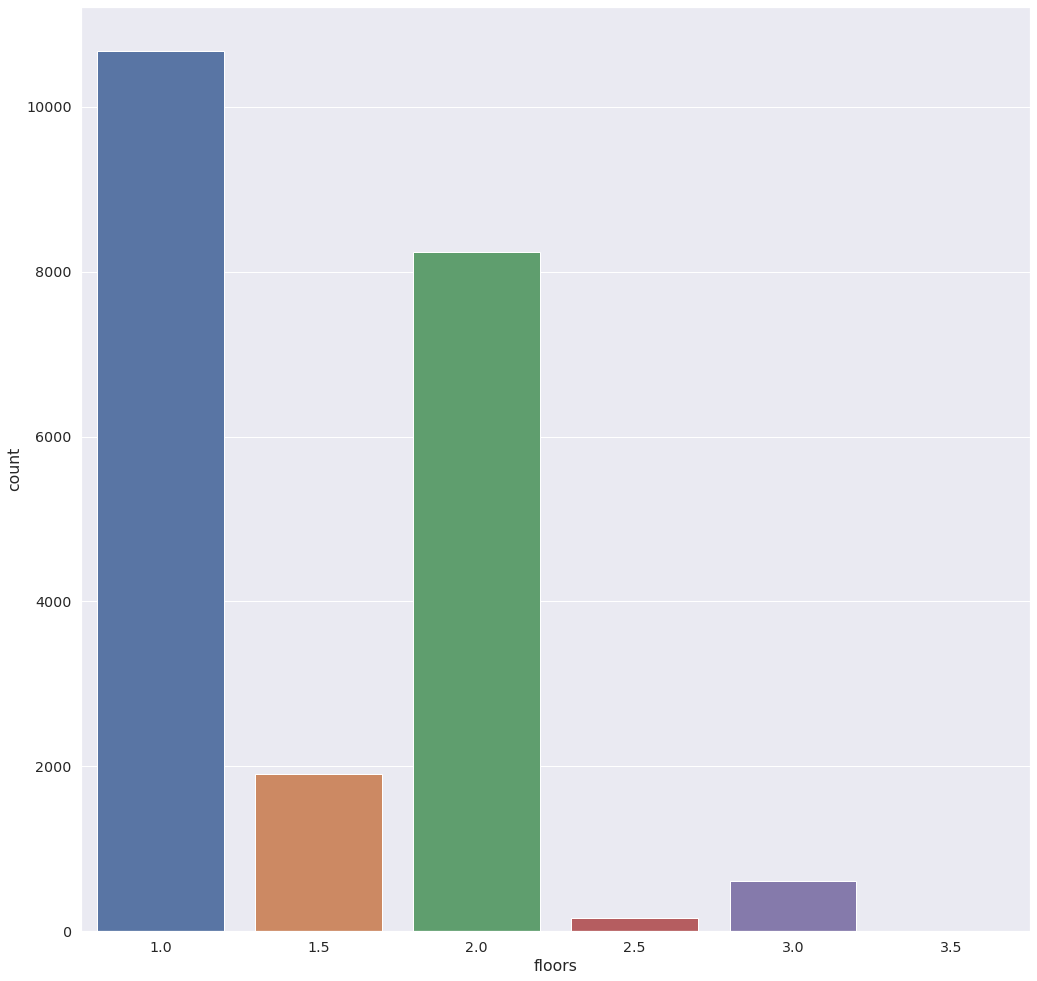

In [57]:
sns.countplot(x=df_Houses['floors'])

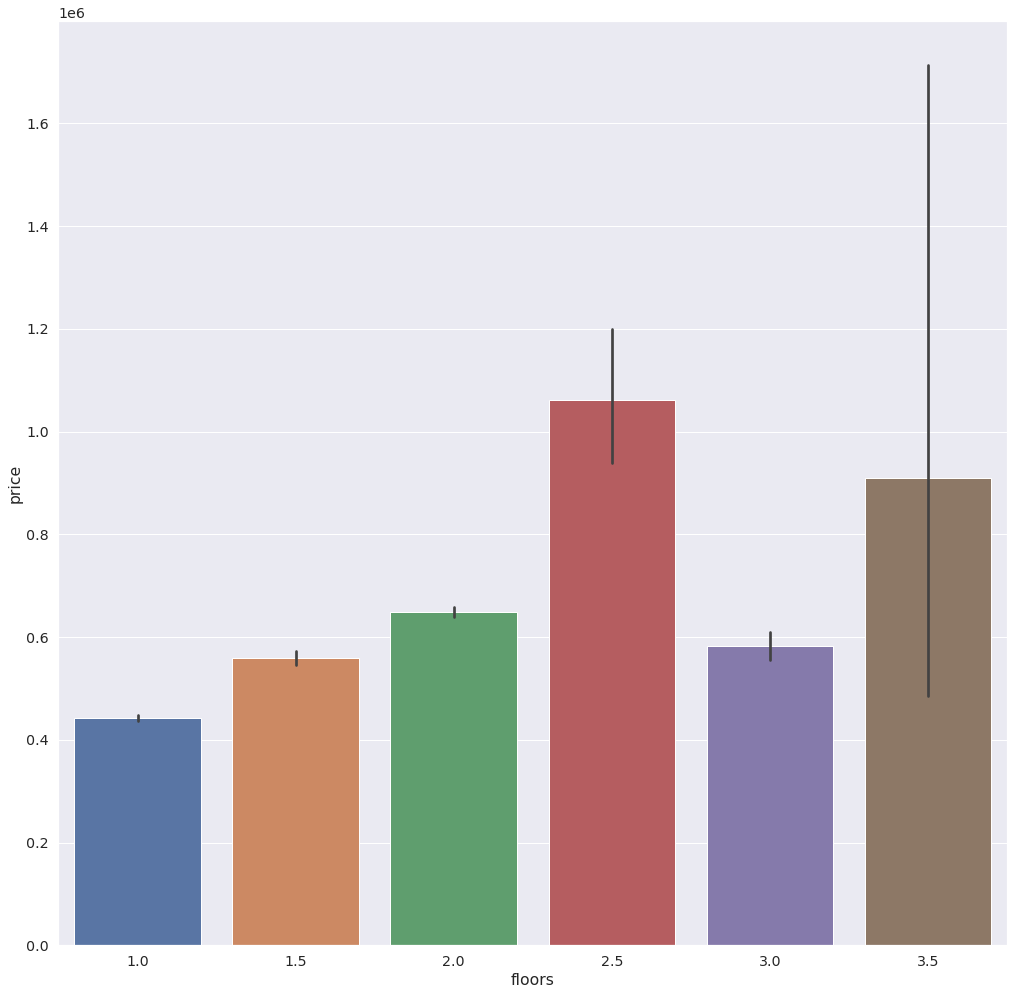

In [58]:
sns.barplot(x=df_Houses['floors'],y = df_Houses['price'])

In [59]:
df_Houses['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


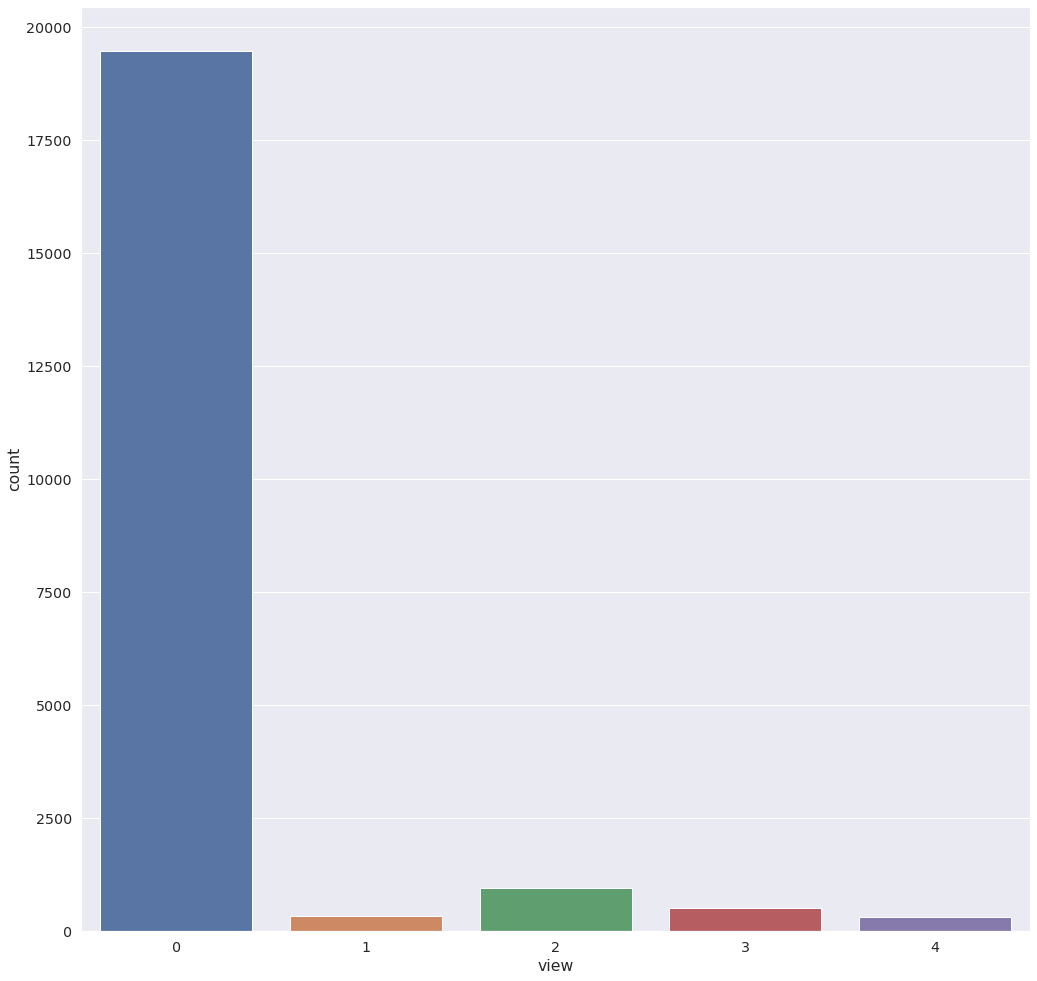

In [60]:
sns.countplot(df_Houses['view'])

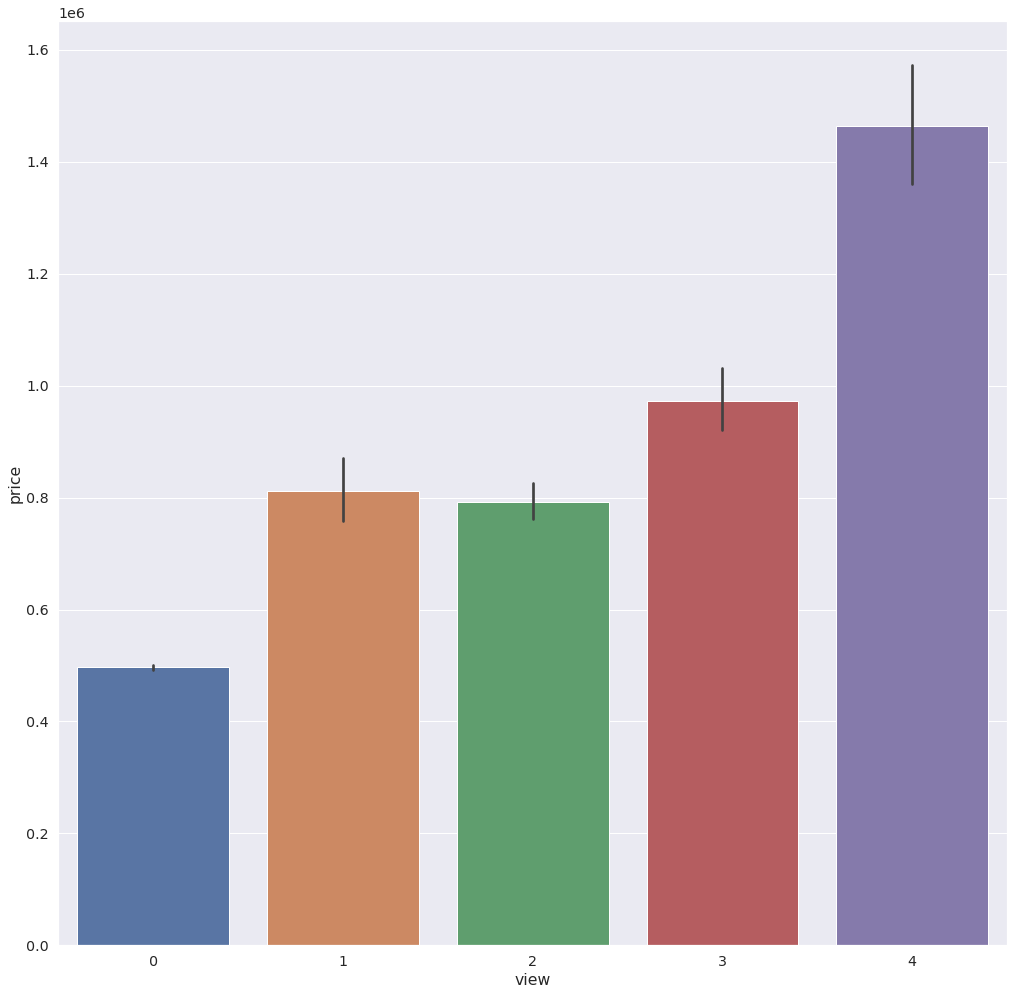

In [61]:
sns.barplot(x=df_Houses['view'],
            y = df_Houses['price'])

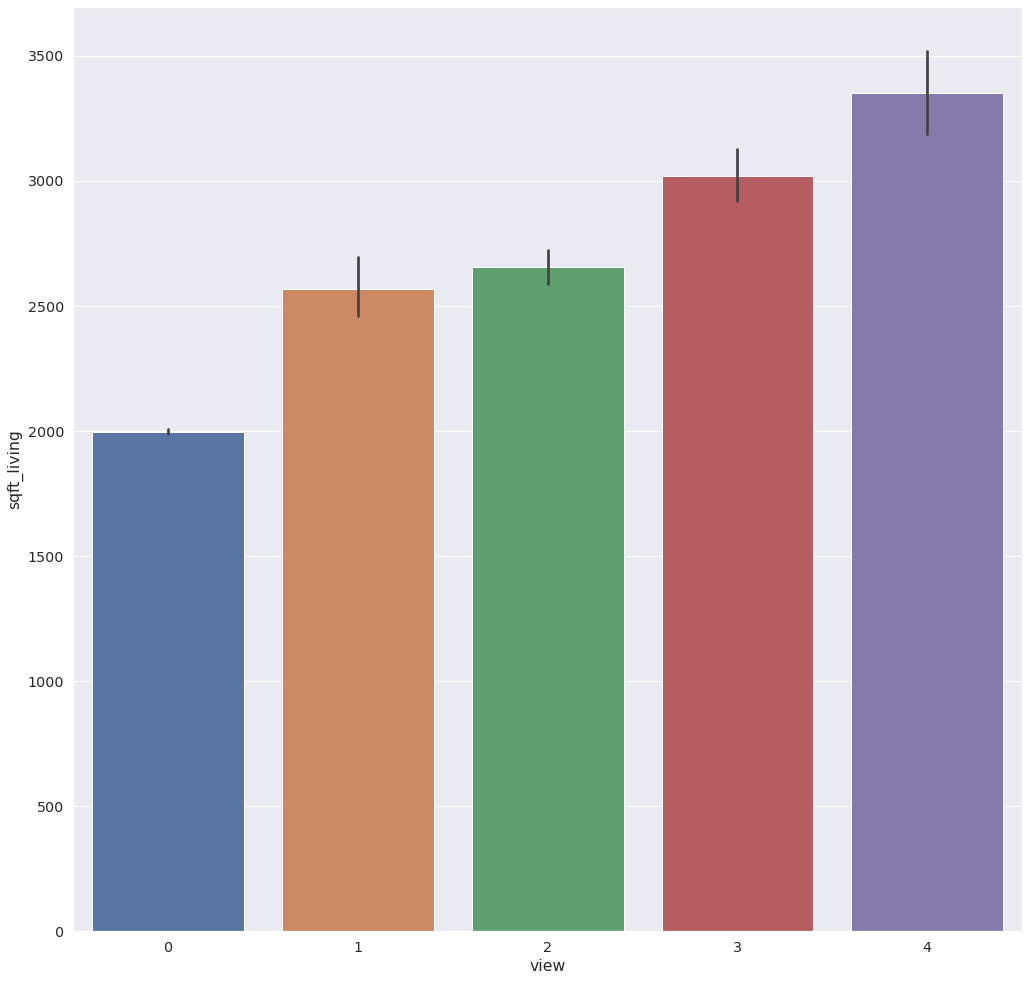

In [62]:
sns.barplot(x=df_Houses['view'],
            y = df_Houses['sqft_living'])

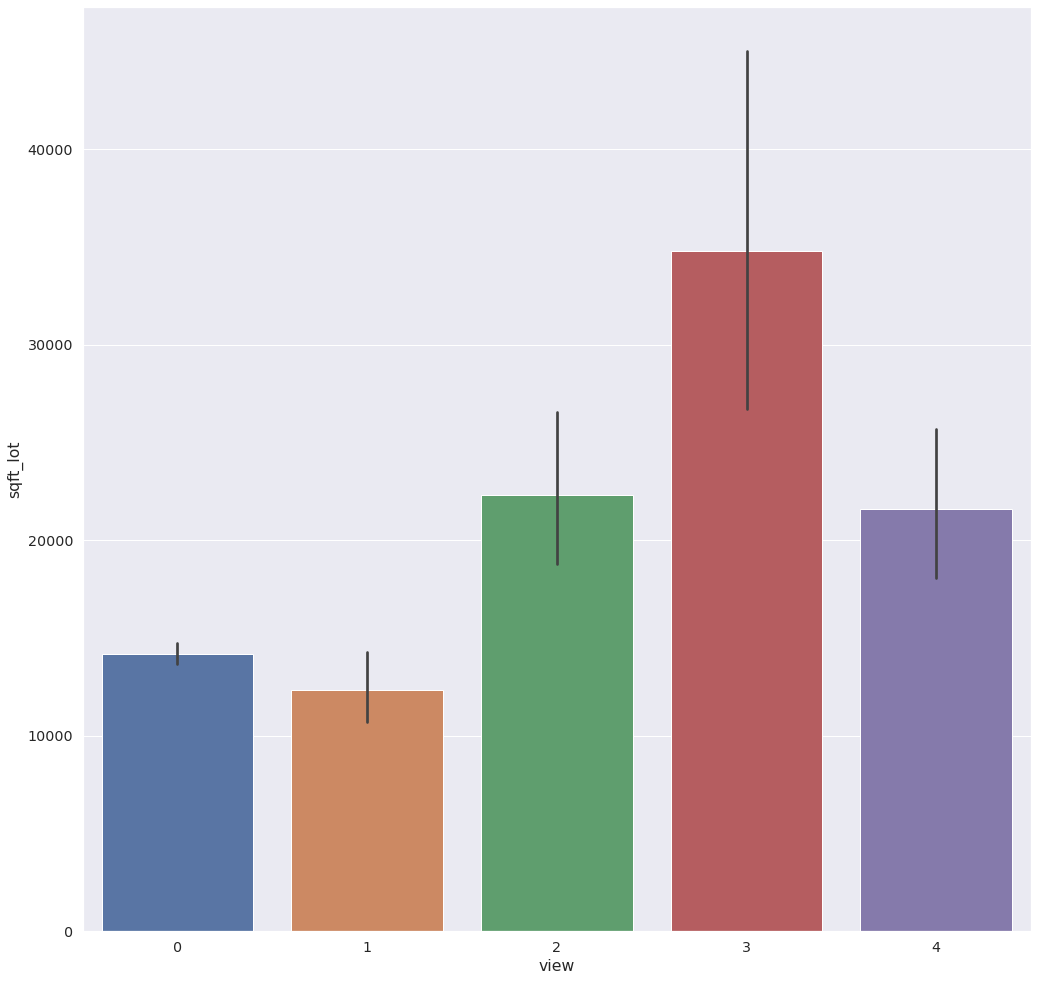

In [63]:
sns.barplot(x=df_Houses['view'],
            y = df_Houses['sqft_lot'])

In [64]:
df_Houses['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

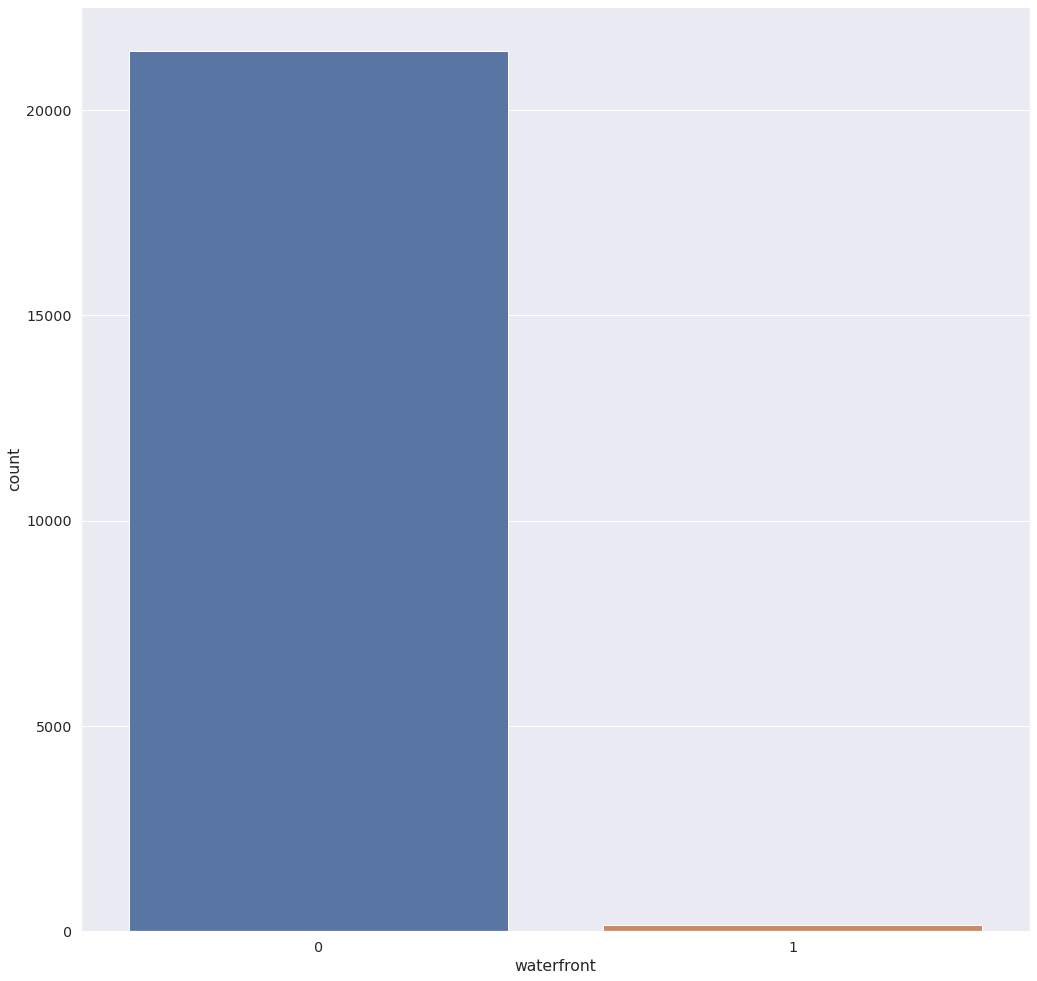

In [65]:
sns.countplot(x=df_Houses['waterfront'])

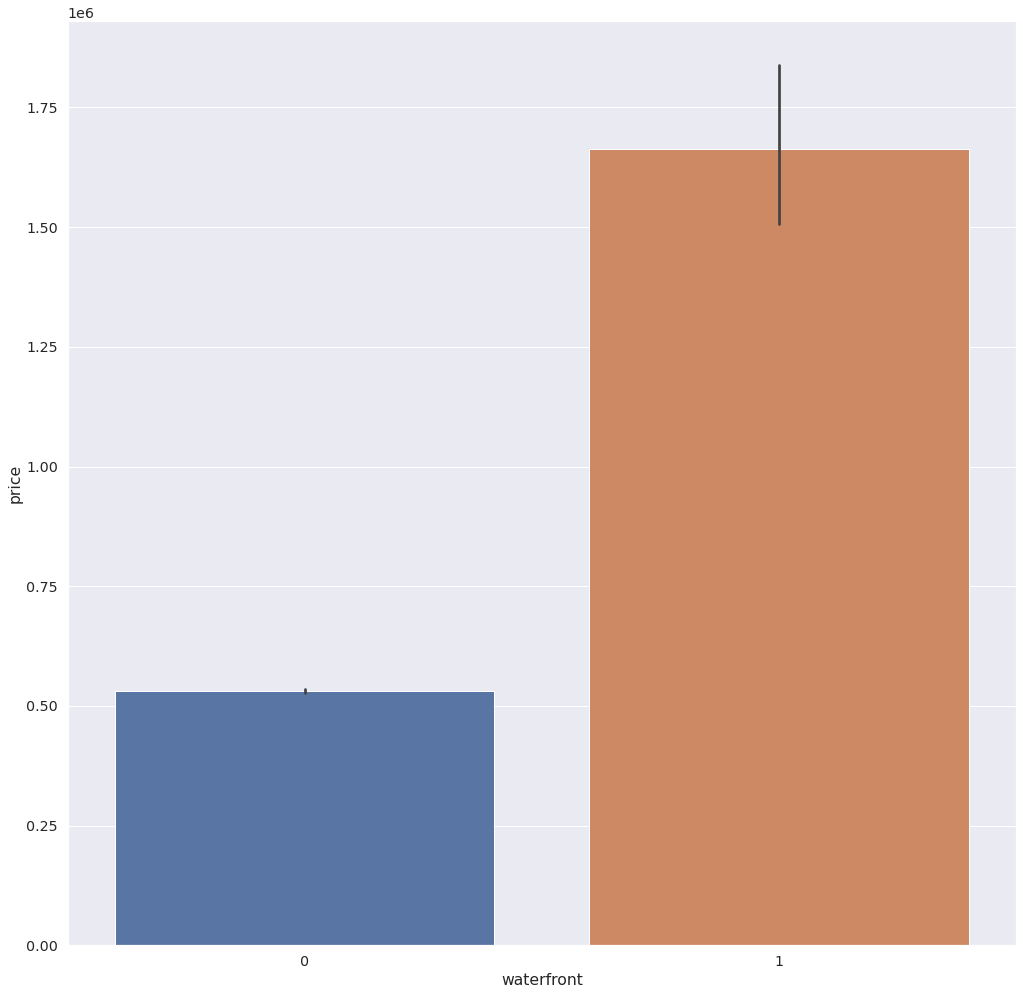

In [66]:
sns.barplot(x=df_Houses['waterfront'],
            y = df_Houses['price'])

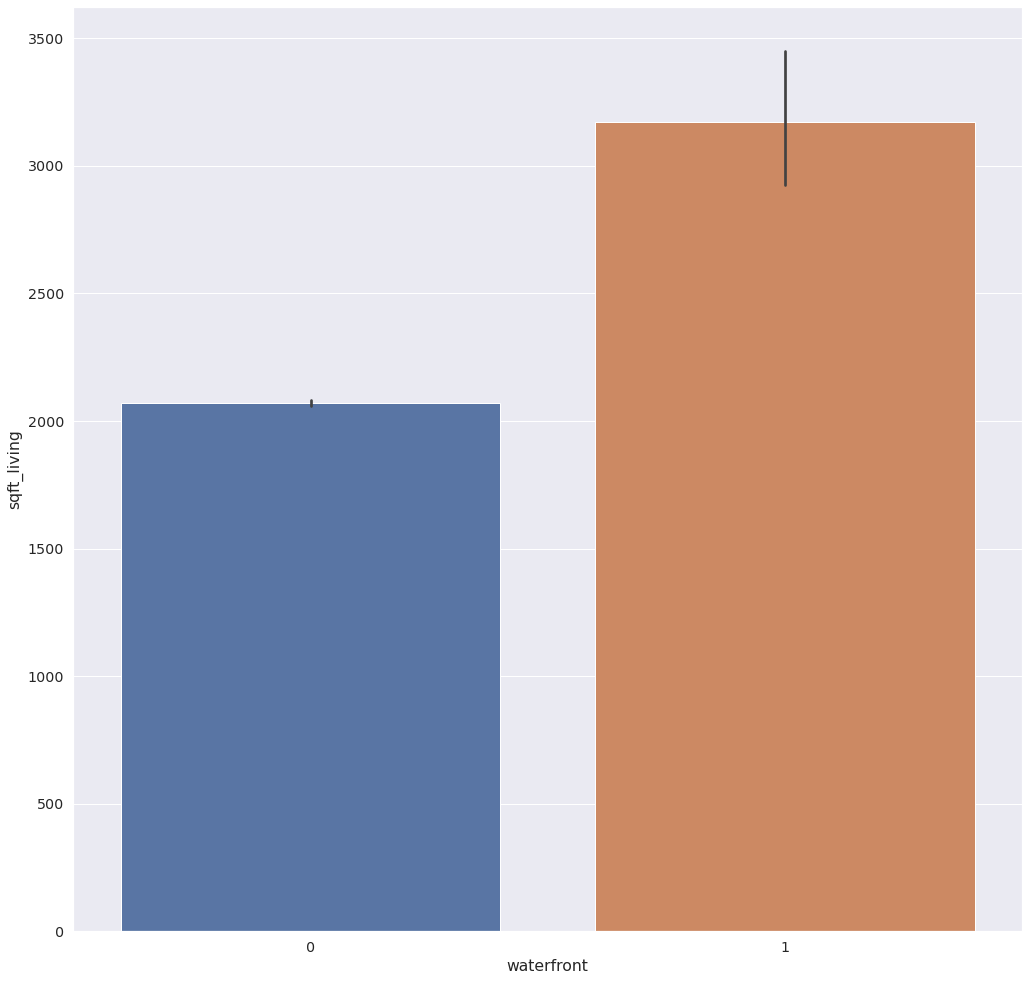

In [67]:
sns.barplot(x=df_Houses['waterfront'],
            y = df_Houses['sqft_living'])

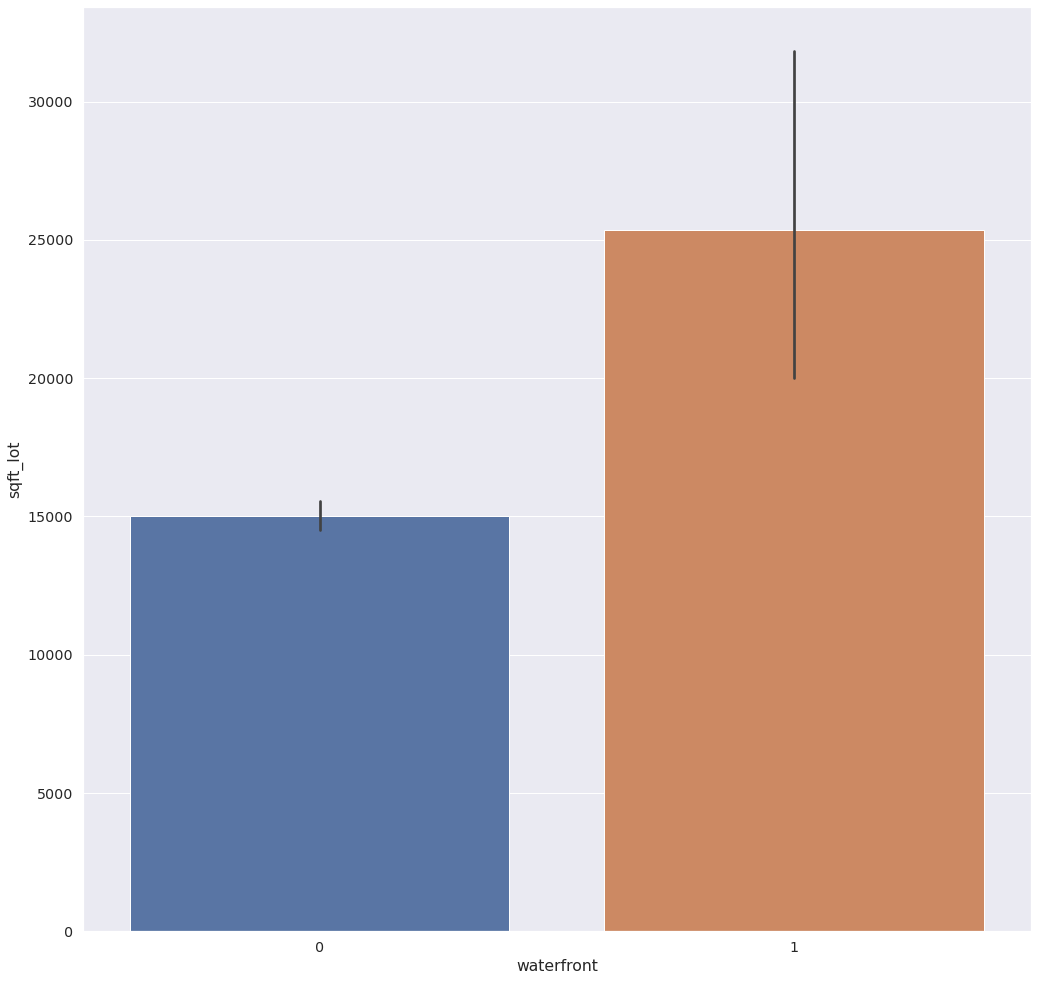

In [68]:
sns.barplot(x=df_Houses['waterfront'],
            y = df_Houses['sqft_lot'])

In [69]:
categorical_columns = list(df_Houses.select_dtypes(include='object').columns)
categorical_columns

['date']

In [70]:
len(categorical_columns)

1

In [71]:
df_Houses[categorical_columns]

date
0      10/13/2014
1       12/9/2014
2       2/25/2015
3       12/9/2014
4       2/18/2015
...           ...
21592   5/21/2014
21593   2/23/2015
21594   6/23/2014
21595   1/16/2015
21596  10/15/2014

[21597 rows x 1 columns]

In [72]:
df_Houses['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
2/15/2015       1
8/30/2014       1
11/30/2014      1
5/17/2014       1
7/27/2014       1
Name: date, Length: 372, dtype: int64

In [73]:
df_Houses["date"] = pd.to_datetime(df_Houses["date"])

In [74]:

df_Houses['month'] = df_Houses['date'].dt.month

In [75]:
df_Houses['month']=pd.to_numeric(df_Houses['month'])

In [76]:
df_Houses['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [77]:
df_Houses['month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

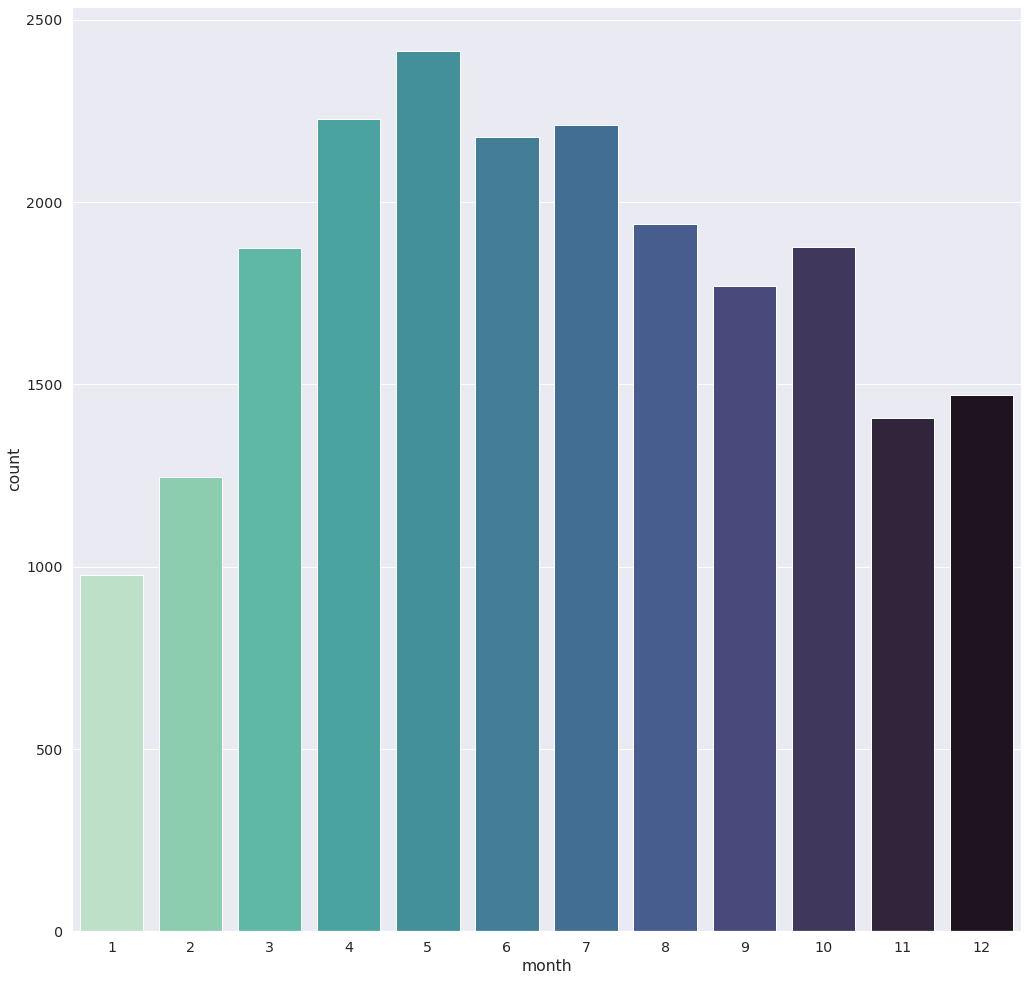

In [78]:
sns.countplot(x=df_Houses['month']  , palette='mako_r')

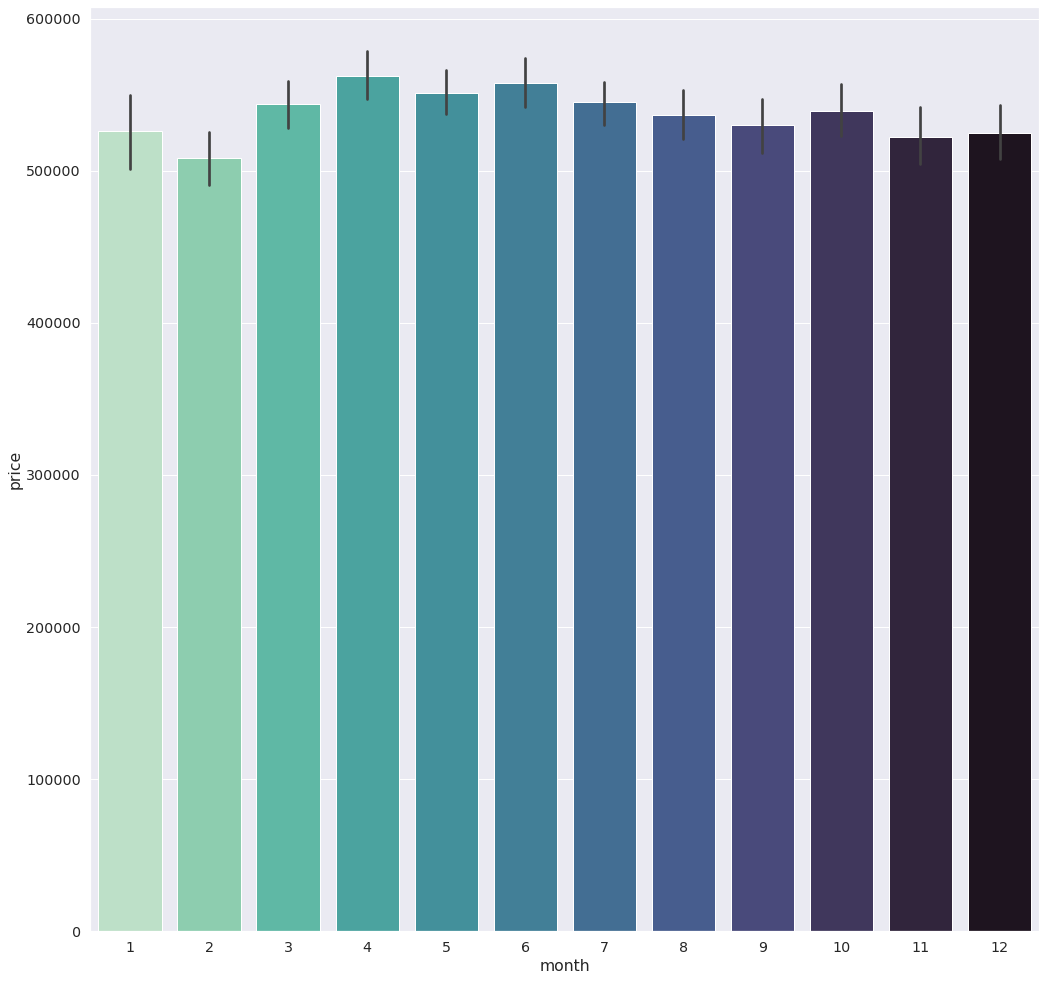

In [79]:
sns.barplot(x=df_Houses['month'],y=df_Houses['price'],palette='mako_r')

In [80]:
df_Houses.corr()['month']

id              -0.011572
price           -0.009928
bedrooms        -0.001046
bathrooms        0.007543
sqft_living      0.012112
sqft_lot        -0.002591
floors           0.014245
waterfront       0.008148
view            -0.005398
condition        0.022388
grade            0.008989
sqft_above       0.010153
sqft_basement    0.006135
yr_built        -0.006235
yr_renovated     0.012864
zipcode         -0.000143
lat              0.014995
long            -0.008404
sqft_living15    0.002513
sqft_lot15       0.003189
month            1.000000
Name: month, dtype: float64

In [81]:
df_Houses.corr()

id     price  ...  sqft_lot15     month
id             1.000000 -0.016772  ...   -0.138557 -0.011572
price         -0.016772  1.000000  ...    0.082845 -0.009928
bedrooms       0.001150  0.308787  ...    0.030690 -0.001046
bathrooms      0.005162  0.525906  ...    0.088303  0.007543
sqft_living   -0.012241  0.701917  ...    0.184342  0.012112
sqft_lot      -0.131911  0.089876  ...    0.718204 -0.002591
floors         0.018608  0.256804  ...   -0.010722  0.014245
waterfront    -0.002727  0.266398  ...    0.030781  0.008148
view           0.011536  0.397370  ...    0.072904 -0.005398
condition     -0.023803  0.036056  ...   -0.003126  0.022388
grade          0.008188  0.667951  ...    0.120981  0.008989
sqft_above    -0.010799  0.605368  ...    0.195077  0.010153
sqft_basement -0.005193  0.323799  ...    0.017550  0.006135
yr_built       0.021617  0.053953  ...    0.070777 -0.006235
yr_renovated  -0.016925  0.126424  ...    0.007944  0.012864
zipcode       -0.008211 -0.053402  ...   -0.147294 -0.000143
lat           -0.001798  0.306692  ...   -0.086139  0.014995
long           0.020672  0.022036  ...    0.255586 -0.008404
sqft_living15 -0.002701  0.585241  ...    0.183515  0.002513
sqft_lot15    -0.138557  0.082845  ...    1.000000  0.003189
month         -0.011572 -0.009928  ...    0.003189  1.000000

[21 rows x 21 columns]

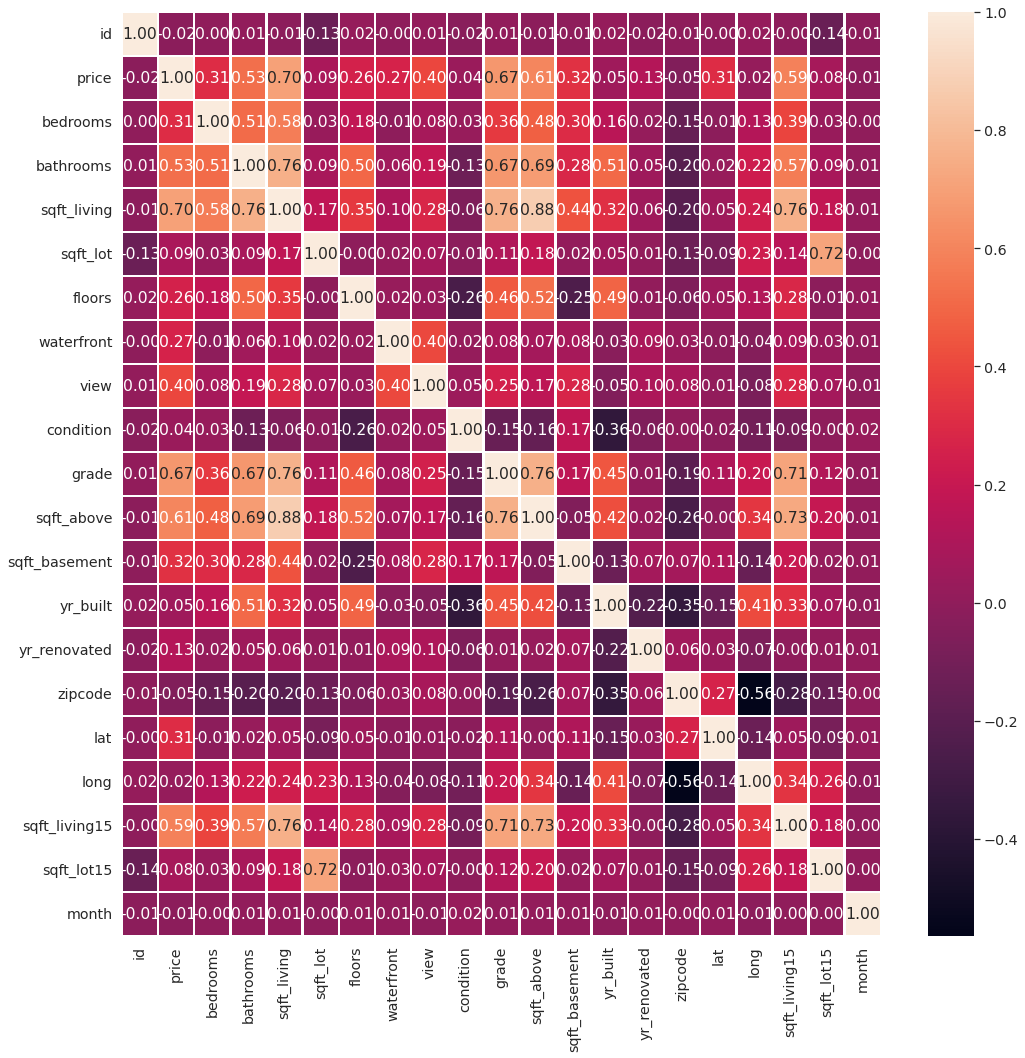

In [82]:
sns.heatmap(df_Houses.corr(),linewidths=1.5
            ,annot=True,fmt='.2f')

In [83]:
df_Houses.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
month           -0.009928
Name: price, dtype: float64

# 3. Data Preprocessing

## 1. Feature Engineering

In [84]:
df_Houses_2 = df_Houses.copy()

In [85]:
df_Houses_2['date'] = pd.to_datetime(df_Houses_2['date'])

In [86]:
df_Houses_2["house_age"] = df_Houses_2["date"].dt.year - df_Houses_2['yr_built']

In [87]:
df_Houses_2['house_age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: house_age, Length: 21597, dtype: int64

In [88]:
df_Houses_2['house_age'].value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: house_age, Length: 117, dtype: int64

In [89]:
df_Houses_2[df_Houses_2['house_age']==-1]

id       date     price  ...  sqft_lot15  month  house_age
1761   1832100030 2014-06-25  597326.0  ...       10000      6         -1
2685   3076500830 2014-10-29  385195.0  ...        4800     10         -1
7519   9520900210 2014-12-31  614285.0  ...        6126     12         -1
8032   1250200495 2014-06-24  455000.0  ...        1852      6         -1
14475  2770601530 2014-08-26  500000.0  ...        6000      8         -1
17084  9126100346 2014-06-17  350000.0  ...        3600      6         -1
19789  9126100765 2014-08-01  455000.0  ...        1495      8         -1
20754  9310300160 2014-08-28  357000.0  ...       18110      8         -1
20836  1257201420 2014-07-09  595000.0  ...        4560      7         -1
20947  6058600220 2014-07-31  230000.0  ...        3000      7         -1
21246  5694500840 2014-11-25  559000.0  ...        3000     11         -1
21356  6169901185 2014-05-20  490000.0  ...        4231      5         -1

[12 rows x 23 columns]

In [90]:
df_Houses_2['house_age']=df_Houses_2['house_age'].apply(abs)

In [91]:
df_Houses_2['house_age'].value_counts()

9      472
8      443
11     431
0      430
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: house_age, Length: 116, dtype: int64

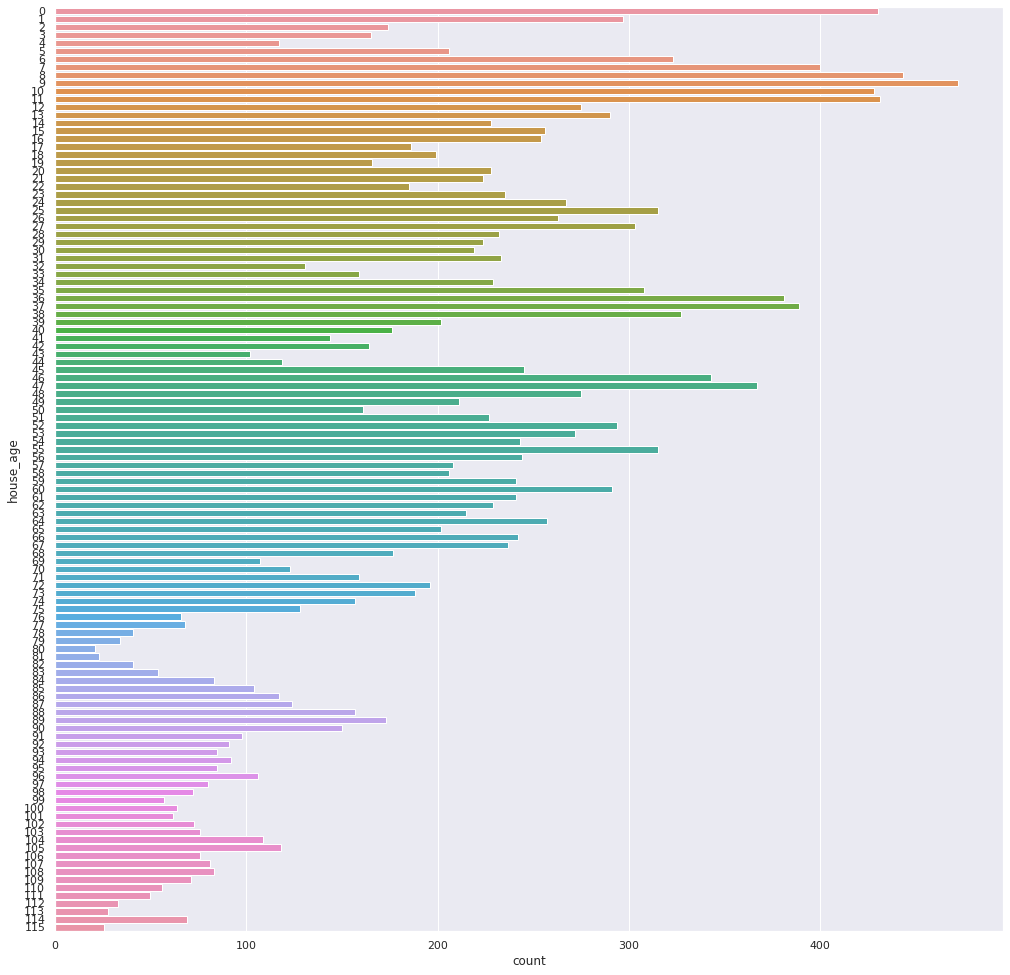

In [92]:
sns.set(font_scale=1)
sns.countplot(y=df_Houses_2['house_age'])

In [93]:
df_Houses_2['renovated'] = df_Houses_2['yr_renovated'].apply(lambda year: 0 if year == 0 else 1)

In [94]:
df_Houses_2['renovated'] 

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21597, dtype: int64

In [95]:
df_Houses_2['renovated'].value_counts()

0    20683
1      914
Name: renovated, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


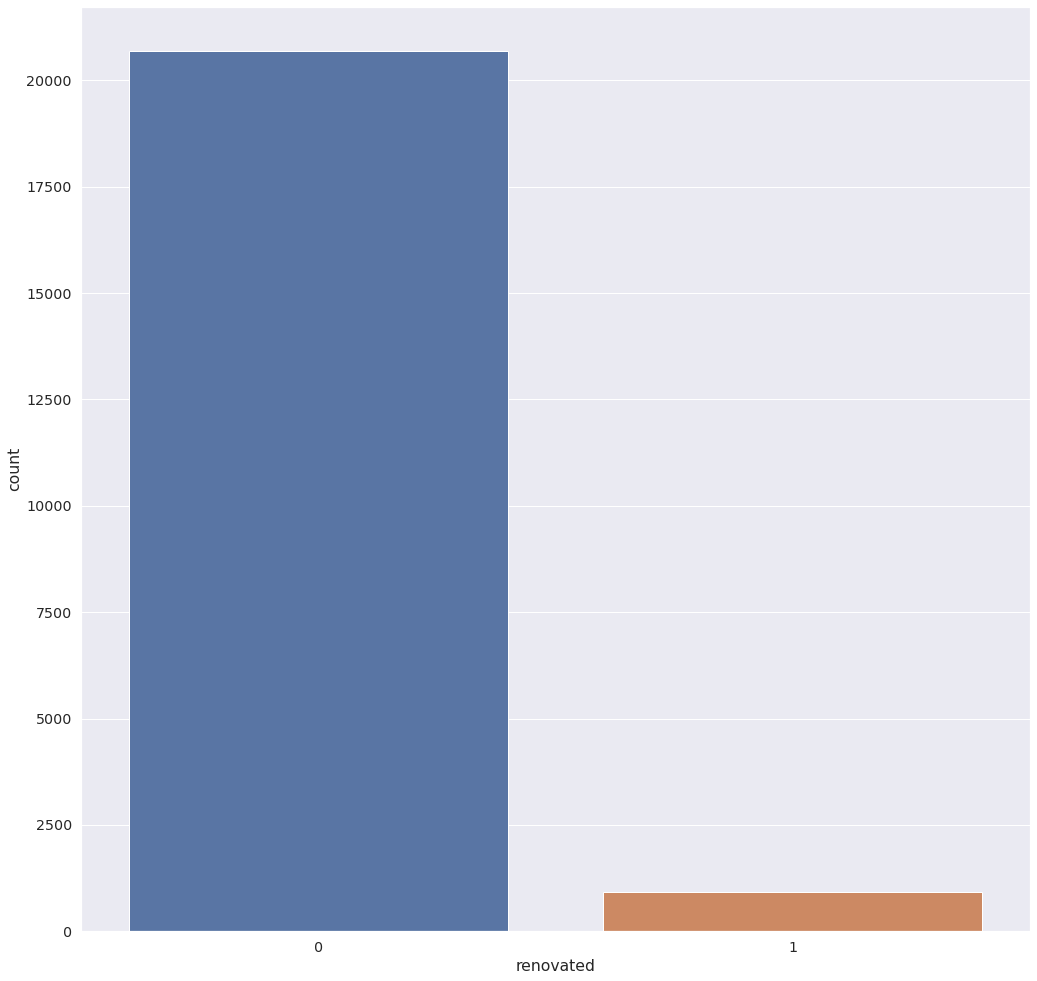

In [96]:
sns.set(font_scale=1.3)
sns.countplot(df_Houses_2['renovated'])

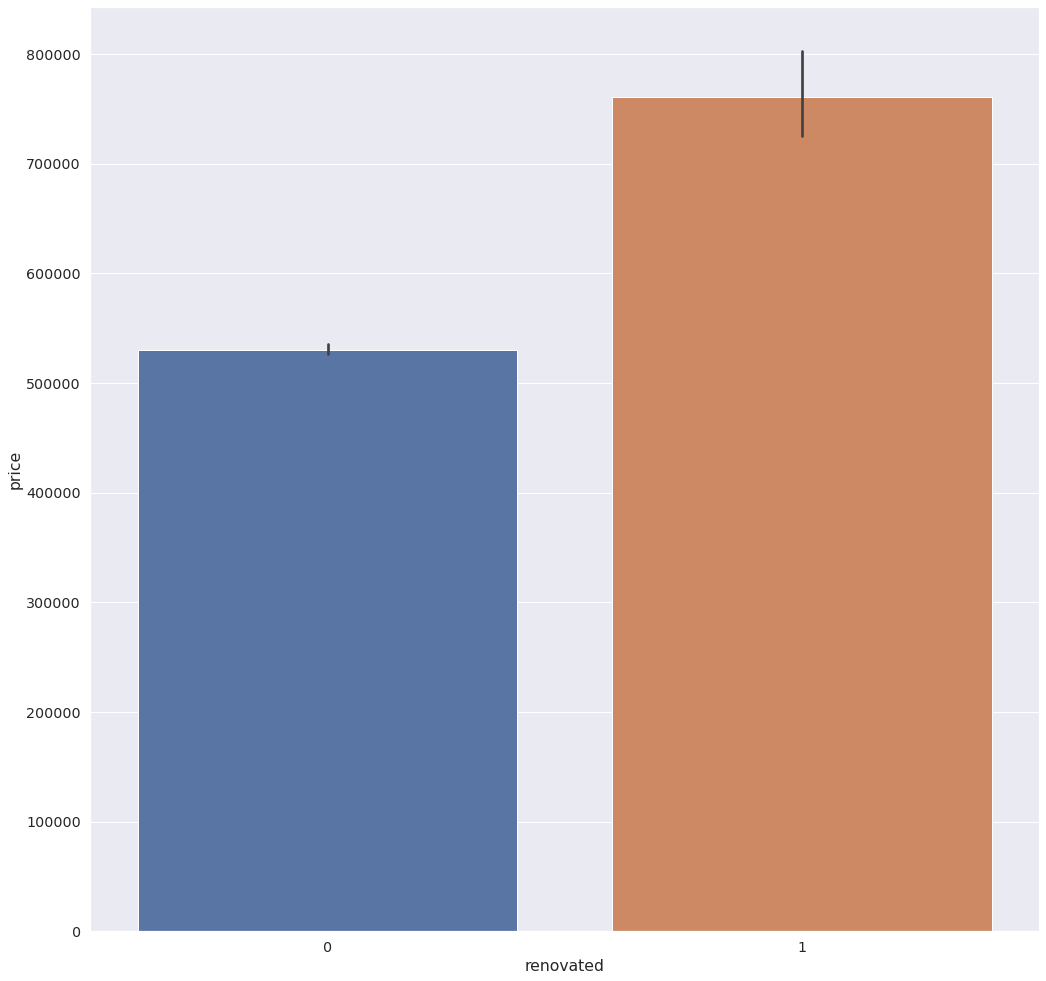

In [97]:
sns.barplot(x= df_Houses_2['renovated'],y=df_Houses_2['price'])

In [98]:
df_Houses_2.drop(['date','yr_renovated','yr_built'],axis=1 ,inplace=True)

In [99]:
df_Houses_2.drop('month',axis=1,inplace=True)

In [100]:
df_Houses_2.drop('zipcode',inplace=True,axis=1)

In [101]:
df_Houses_2.drop('id',inplace=True,axis=1)

In [102]:
df_Houses_2['sqft_basement']=df_Houses_2['sqft_basement'].apply(lambda is_basment: 0 if is_basment == 0 else 1)

In [103]:
df_Houses_2['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: sqft_basement, Length: 21597, dtype: int64

In [104]:
df_Houses_2['sqft_basement'].value_counts()

0    13110
1     8487
Name: sqft_basement, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


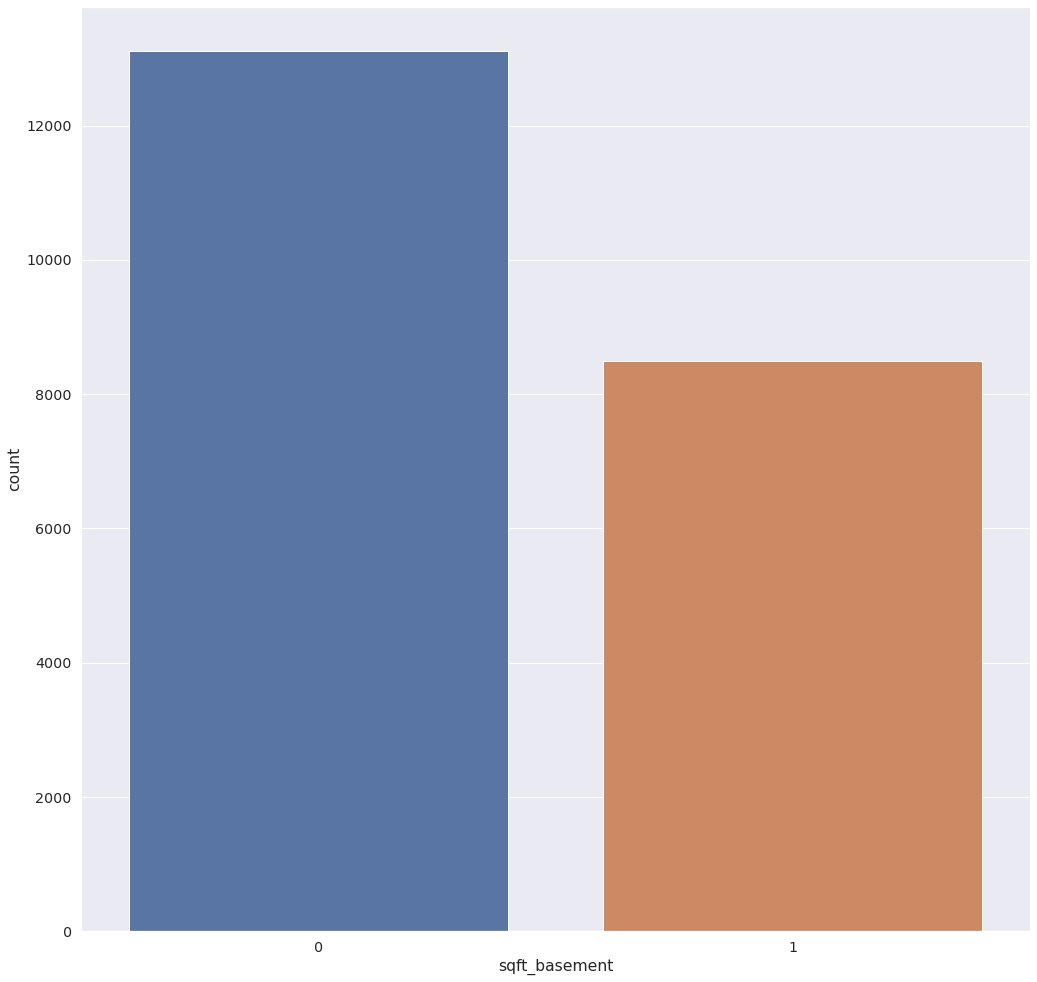

In [105]:
sns.countplot(df_Houses_2['sqft_basement'])

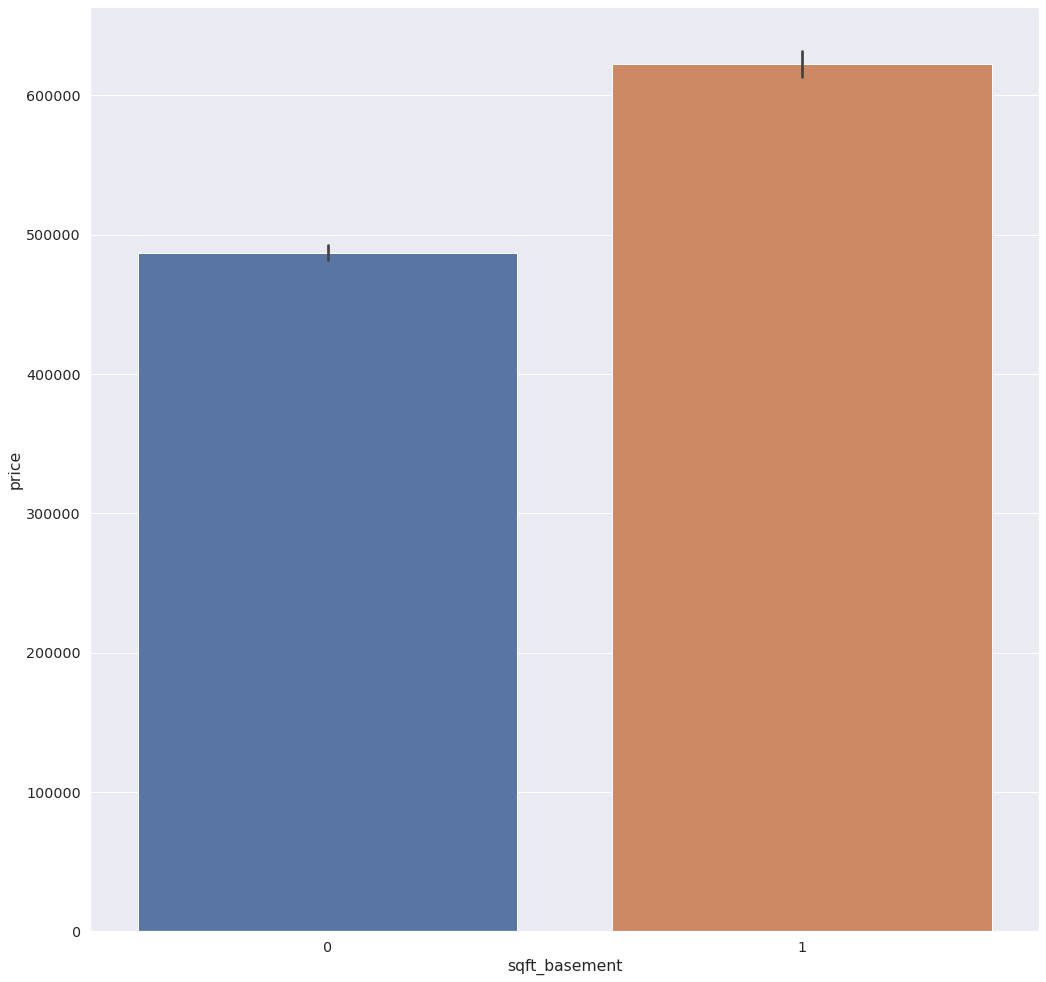

In [106]:
sns.barplot(x=df_Houses_2['sqft_basement'],y=df_Houses['price'])

In [107]:
'''
num_outlier= list(df_Houses_2.select_dtypes(include='number').columns)[1:]
num_outlier
'''

"\nnum_outlier= list(df_Houses_2.select_dtypes(include='number').columns)[1:]\nnum_outlier\n"

In [108]:
'''
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df_Houses_2 , 0, df_Houses_2[num_outlier])
len(outliers_indices)
'''

'\nfrom datasist.structdata import detect_outliers\noutliers_indices = detect_outliers(df_Houses_2 , 0, df_Houses_2[num_outlier])\nlen(outliers_indices)\n'

In [109]:
#df_Houses_2.drop(outliers_indices,inplace=True)

In [110]:
df_Houses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  house_age      21597 non-null  int64  
 17  renovated      21597 non-null  int64  
dtypes: flo

In [111]:
df_Houses_2.sample(5)

price  bedrooms  bathrooms  ...  sqft_lot15  house_age  renovated
18046  577000.0         2       1.75  ...        5458         68          0
9865   164950.0         3       1.75  ...       13330         58          0
3628   435000.0         3       1.00  ...        5834         94          0
7726   340000.0         4       2.25  ...        7383         54          0
19781  282000.0         3       2.50  ...        5141          8          0

[5 rows x 18 columns]

In [112]:
df_Houses_2.corr()

price  bedrooms  bathrooms  ...  sqft_lot15  house_age  renovated
price          1.000000  0.308787   0.525906  ...    0.082845  -0.053901   0.126082
bedrooms       0.308787  1.000000   0.514508  ...    0.030690  -0.155831   0.018100
bathrooms      0.525906  0.514508   1.000000  ...    0.088303  -0.507574   0.050064
sqft_living    0.701917  0.578212   0.755758  ...    0.184342  -0.318605   0.055039
sqft_lot       0.089876  0.032471   0.088373  ...    0.718204  -0.052866   0.007788
floors         0.256804  0.177944   0.502582  ...   -0.010722  -0.489486   0.006348
waterfront     0.266398 -0.006834   0.063744  ...    0.030781   0.026083   0.093282
view           0.397370  0.080008   0.188386  ...    0.072904   0.053652   0.104095
condition      0.036056  0.026496  -0.126479  ...   -0.003126   0.360832  -0.060309
grade          0.667951  0.356563   0.665838  ...    0.120981  -0.448319   0.013854
sqft_above     0.605368  0.479386   0.686668  ...    0.195077  -0.424405   0.023144
sqft_basement  0.180082  0.162186   0.162766  ...   -0.040502   0.167747   0.048892
lat            0.306692 -0.009951   0.024280  ...   -0.086139   0.147928   0.029302
long           0.022036  0.132054   0.224903  ...    0.255586  -0.410007  -0.068327
sqft_living15  0.585241  0.393406   0.569884  ...    0.183515  -0.326728  -0.002778
sqft_lot15     0.082845  0.030690   0.088303  ...    1.000000  -0.070784   0.008011
house_age     -0.053901 -0.155831  -0.507574  ...   -0.070784   1.000000   0.224840
renovated      0.126082  0.018100   0.050064  ...    0.008011   0.224840   1.000000

[18 rows x 18 columns]

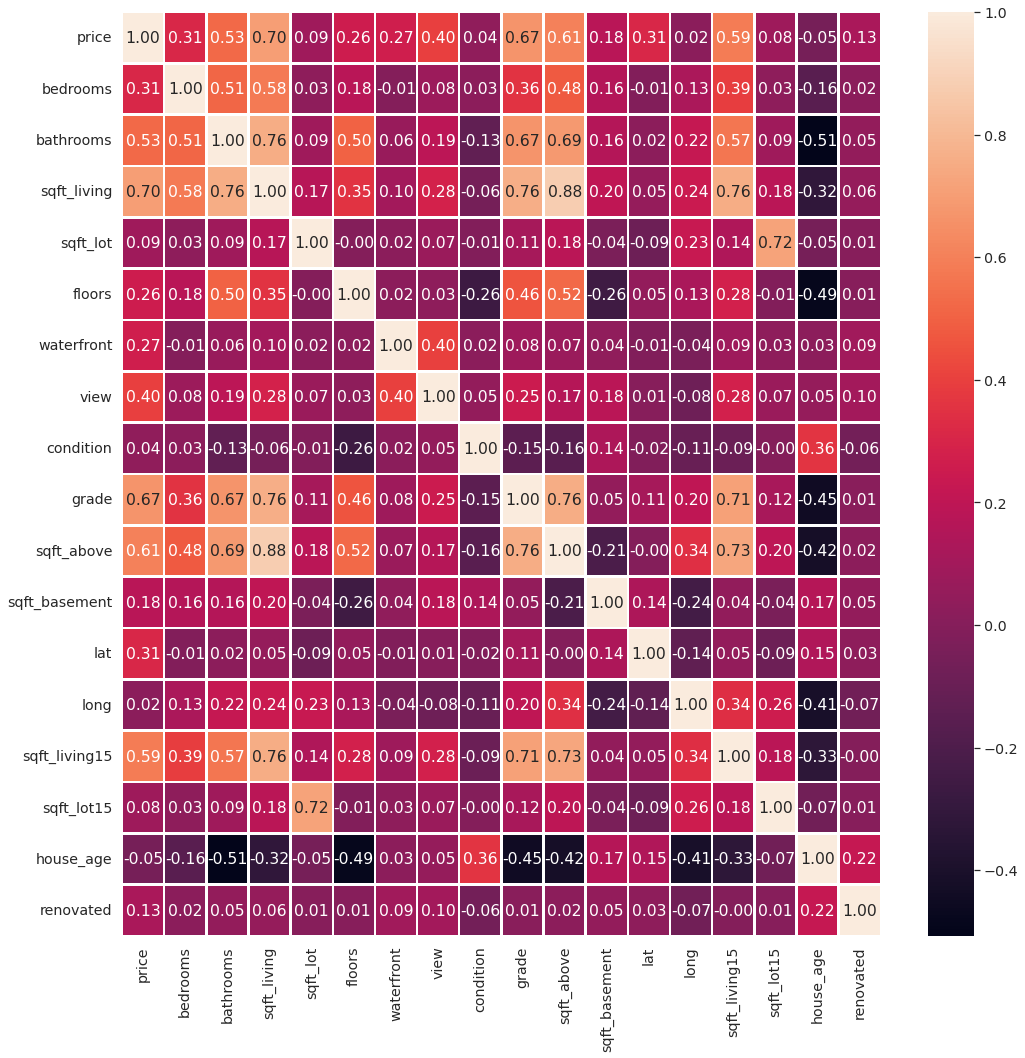

In [113]:
sns.heatmap(df_Houses_2.corr(),linewidths=1.5
            ,annot=True,fmt='.2f')

In [114]:
df_Houses_2.corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.180082
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
house_age       -0.053901
renovated        0.126082
Name: price, dtype: float64

In [115]:
most_corr = list(df_Houses_2.corr().columns[df_Houses_2.corr()['price']>0.5])
most_corr[1:]

['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

## 2. Feature  Transformation

### 1. Spliting

In [116]:
x = df_Houses_2.drop(['price'],axis=1)
#x = df_Houses_2[most_corr[1:]]

In [117]:
x

bedrooms  bathrooms  sqft_living  ...  sqft_lot15  house_age  renovated
0             3       1.00         1180  ...        5650         59          0
1             3       2.25         2570  ...        7639         63          1
2             2       1.00          770  ...        8062         82          0
3             4       3.00         1960  ...        5000         49          0
4             3       2.00         1680  ...        7503         28          0
...         ...        ...          ...  ...         ...        ...        ...
21592         3       2.50         1530  ...        1509          5          0
21593         4       2.50         2310  ...        7200          1          0
21594         2       0.75         1020  ...        2007          5          0
21595         3       2.50         1600  ...        1287         11          0
21596         2       0.75         1020  ...        1357          6          0

[21597 rows x 17 columns]

In [118]:
y = df_Houses_2['price']

In [119]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [122]:
x_train

bedrooms  bathrooms  sqft_living  ...  sqft_lot15  house_age  renovated
2093          4       2.00         2130  ...        3990         92          0
9738          3       1.00         1160  ...        3750        105          0
4382          3       1.75         1820  ...        9480         67          0
11641         3       1.75         1660  ...        9489         59          0
13114         2       2.25         1390  ...        1369          5          0
...         ...        ...          ...  ...         ...        ...        ...
11532         5       1.75         2500  ...       11617         48          0
16065         4       2.50         2960  ...        5000          8          0
14501         2       1.00         1270  ...        1320         94          0
14555         3       1.00         1400  ...        3060        115          0
11590         5       3.25         3350  ...        4000         17          0

[17277 rows x 17 columns]

In [123]:
x_train.shape

(17277, 17)

In [124]:
x_test

bedrooms  bathrooms  sqft_living  ...  sqft_lot15  house_age  renovated
2398          3       1.00          950  ...        4500         72          0
14724         2       1.00         1190  ...        7800         66          0
20980         4       3.00         5520  ...        8278          6          0
12156         3       2.00         1980  ...       12150         20          0
19485         2       1.75         1870  ...        6000         67          0
...         ...        ...          ...  ...         ...        ...        ...
4328          2       1.00         1120  ...      217800         38          0
3379          4       2.50         3290  ...       40371         24          0
10909         4       1.00         1600  ...        4500         89          0
16015         4       2.50         3170  ...       12610         13          0
3102          4       1.75         1830  ...       12540         57          0

[4320 rows x 17 columns]

In [125]:
x_test.shape

(4320, 17)

In [126]:
y_train

2093      800000.0
9738      315000.0
4382      700000.0
11641     434000.0
13114     465000.0
           ...    
11532     840000.0
16065     385000.0
14501     355000.0
14555     887200.0
11590    1110000.0
Name: price, Length: 17277, dtype: float64

In [127]:
y_train.shape

(17277,)

In [128]:
y_test

2398      325000.0
14724     295950.0
20980    1270000.0
12156     479900.0
19485     229500.0
           ...    
4328      290000.0
3379      783350.0
10909     725000.0
16015     455000.0
3102      283200.0
Name: price, Length: 4320, dtype: float64

In [129]:
y_test.shape

(4320,)

### 2. Scalling 

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scalar = StandardScaler()

In [132]:
scalar.fit(x_train)
x_train = scalar.transform(x_train)

In [133]:
x_test=scalar.transform(x_test)

In [134]:
x_train

array([[ 0.66881048, -0.15489451,  0.04969084, ..., -0.3263716 ,
         1.6569051 , -0.21450687],
       [-0.40378199, -1.44973541, -1.0030376 , ..., -0.33521649,
         2.09895521, -0.21450687],
       [-0.40378199, -0.47860473, -0.28674814, ..., -0.12404464,
         0.80680872, -0.21450687],
       ...,
       [-1.47637446, -1.44973541, -0.88365602, ..., -0.42477105,
         1.72491281, -0.21450687],
       [-0.40378199, -1.44973541, -0.7425687 , ..., -0.36064556,
         2.43899376, -0.21450687],
       [ 1.74140296,  1.46365662,  1.37374105, ..., -0.32600306,
        -0.89338403, -0.21450687]])

In [135]:
x_test

array([[-0.40378199, -1.44973541, -1.23094788, ..., -0.3075762 ,
         0.976828  , -0.21450687],
       [-1.47637446, -1.44973541, -0.97047899, ..., -0.1859589 ,
         0.77280487, -0.21450687],
       [ 0.66881048,  1.13994639,  3.72881396, ..., -0.16834282,
        -1.26742643, -0.21450687],
       ...,
       [ 0.66881048, -1.44973541, -0.52551129, ..., -0.3075762 ,
         1.55489353, -0.21450687],
       [ 0.66881048,  0.49252594,  1.17838938, ..., -0.00869248,
        -1.02939945, -0.21450687],
       [ 0.66881048, -0.47860473, -0.27589527, ..., -0.01127224,
         0.46677017, -0.21450687]])

# 4. Modelling and Evalution

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [137]:
models  = {
    "LR" : LinearRegression(),
    "SVM" : SVR(),
    "XGB" : XGBRegressor(n_estimators=1000,n_jobs=-1,objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10),
    "KNN" : KNeighborsRegressor(n_neighbors=3),
    "Random_Forest" : RandomForestRegressor(n_estimators=1000,n_jobs=-1)
}

In [138]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('--'*50)    

Using model: LR
Training Score: 0.6941460468098204
Test Score: 0.7029837715771203
----------------------------------------------------------------------------------------------------
Using model: SVM
Training Score: -0.05825706967994759
Test Score: -0.052395349097792865
----------------------------------------------------------------------------------------------------
Using model: XGB
Training Score: 0.9807222129957154
Test Score: 0.9105229498198472
----------------------------------------------------------------------------------------------------
Using model: KNN
Training Score: 0.8942017901647524
Test Score: 0.7890153132092294
----------------------------------------------------------------------------------------------------
Using model: Random_Forest
Training Score: 0.9830917533829956
Test Score: 0.890871824078191
----------------------------------------------------------------------------------------------------


In [139]:
model = XGBRegressor(n_estimators=1000,n_jobs=-1,objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10)

In [140]:
model.fit(x_train,y_train)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=1000,
             n_jobs=-1, objective='reg:squarederror')

In [141]:
y_pred = model.predict(x_test)

In [156]:
pd.options.display.float_format = '{:.4f}'.format
y_compare={'Actual Output':y_test, 'Predicted Output':y_pred}
pd.DataFrame(y_compare)

Actual Output  Predicted Output
2398     325000.0000       237349.0781
14724    295950.0000       305243.5625
20980   1270000.0000      1389429.3750
12156    479900.0000       358049.0625
19485    229500.0000       279210.7812
...              ...               ...
4328     290000.0000       296965.3750
3379     783350.0000       864280.6250
10909    725000.0000       615518.7500
16015    455000.0000       518126.0000
3102     283200.0000       293775.0625

[4320 rows x 2 columns]

In [143]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.9807222129957154
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9105229498198472


In [144]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [145]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
medien_error = median_absolute_error(y_test,y_pred)

In [146]:
print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 64148.80625
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 38563.046875
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 11951363997.73378
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 109322.29414778021


# 5. Saving and Loading Model   

In [147]:
import joblib

In [148]:
joblib.dump(model, 'model.h5')

['model.h5']

In [149]:
joblib.dump(scalar, 'scaler.h5')

['scaler.h5']

In [150]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'renovated'],
      dtype='object')

In [158]:
custom_data = []
for inp in x.columns:
    print(f'{inp}: ')
    val = float(input())
    custom_data.append(val)

data = []
for v in custom_data:
    data.append(float(v))

model.predict(scalar.transform([data]))

bedrooms: 
2
bathrooms: 
3
sqft_living: 
1000
sqft_lot: 
1000
floors: 
4
waterfront: 
1
view: 
2
condition: 
3
grade: 
5
sqft_above: 
1000
sqft_basement: 
0
lat: 
47.2
long: 
-122
sqft_living15: 
990
sqft_lot15: 
980
house_age: 
20
renovated: 
1


array([396208.75], dtype=float32)

In [152]:
scaler = joblib.load('scaler.h5')
inp = scaler.transform([[5, 12.0, 2000, 4000, 2.0, 1, 3, 3, 11, 2000, 0, 47.2, -122.0, 2000, 3800, 22, 1]])

In [153]:
inp

array([[ 1.74140296, 12.79351449, -0.09139647, -0.26673486,  0.93144991,
        11.1443103 ,  3.5810584 , -0.62924542,  2.8436035 ,  0.24969539,
        -0.80094956, -2.60144302,  1.5105198 ,  0.01327235, -0.33337381,
        -0.72336475,  4.66185529]])

In [154]:
model = joblib.load('model.h5')
out = model.predict(inp)

In [155]:
out

array([1086280.], dtype=float32)